In the case of Undercomplete Autoencoders, we are squeezing the information into fewer dimensions (hence the bottleneck) while trying to ensure that we can still get back to the original values. Therefore, we are creating a custom function that compresses the data, which is a way to reduce the dimensionality and extract meaningful information.

The purpose of an autoencoder is to encode important information efficiently. A common approach to achieve that is by creating a bottleneck, which forces the model to preserve what’s essential and discard unimportant bits.

Autoencoder can distinguish between what’s essential by simultaneously training an encoder and decoder, with the goal of the decoder being the recreation of original data from encoded representation.

# Undercomplete Autoencoder

The goal of an Undercomplete AE is to efficiently encode information from input data into a lower-dimensional latent space (bottleneck). We achieve this objective by ensuring that the inputs can be recreated with minimal loss using a decoder.

# Since we are trying to recreate (predict) features themselves, we do not require labelled target data. Hence, we can refer to Autoencoders as Unsupervised models,

Same object as PCA. 
Dimensionality reduction
Feature extraction

In [1]:
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Model, load_model # for creating a Neural Network Autoencoder model
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense, LeakyReLU, BatchNormalization # for adding layers to AE model
from tensorflow.keras.utils import plot_model # for plotting model diagram

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version

# Sklearn
import sklearn # for model evaluation
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.preprocessing import MinMaxScaler # For rescaling metrics to fit into 0 to 1 range
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples

# Visualization
import matplotlib 
import matplotlib.pyplot as plt # for plotting model loss
print('matplotlib: %s' % matplotlib.__version__) # print version
import graphviz # for showing model diagram
print('graphviz: %s' % graphviz.__version__) # print version

Tensorflow/Keras: 2.7.0
pandas: 1.3.4
sklearn: 1.2.2
matplotlib: 3.4.3
graphviz: 0.20.1


In [2]:
# Set Pandas options to display more columns
pd.options.display.max_columns=50

# Read in the weather data csv
df=pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/weatherAUS.csv', encoding='utf-8')

In [3]:
# Drop rows where any of the values are missing. 
# Note, in this case it drops ~60% of the rows. Since we are using this data just as an example, it's ok.
# However, when you work with your own data, you may want to explore other options to fill in NA's with, say, mean values
df=df.dropna(axis=0)

# Create a flag for RainToday
df['RainTodayFlag']=df['RainToday'].apply(lambda x: 1 if x=='Yes' else 0)

In [16]:
# Show a snaphsot of data
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
6049    2009-01-01    Cobar     17.9     35.2       0.0         12.0   
6050    2009-01-02    Cobar     18.4     28.9       0.0         14.8   
6052    2009-01-04    Cobar     19.4     37.6       0.0         10.8   
6053    2009-01-05    Cobar     21.9     38.4       0.0         11.4   
6054    2009-01-06    Cobar     24.2     41.0       0.0         11.2   
...            ...      ...      ...      ...       ...          ...   
142298  2017-06-20   Darwin     19.3     33.4       0.0          6.0   
142299  2017-06-21   Darwin     21.2     32.6       0.0          7.6   
142300  2017-06-22   Darwin     20.7     32.8       0.0          5.6   
142301  2017-06-23   Darwin     19.5     31.8       0.0          6.2   
142302  2017-06-24   Darwin     20.2     31.7       0.0          5.6   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
6049        12.3         SSW           48.0        ENE         SW   
6050        13.0           S           37.0        SSE        SSE   
6052        10.6         NNE           46.0        NNE        NNW   
6053        12.2         WNW           31.0        WNW        WSW   
6054         8.4         WNW           35.0         NW        WNW   
...          ...         ...            ...        ...        ...   
142298      11.0         ENE           35.0         SE         NE   
142299       8.6           E           37.0         SE         SE   
142300      11.0           E           33.0          E          W   
142301      10.6         ESE           26.0         SE        NNW   
142302      10.7         ENE           30.0        ENE        NNW   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
6049             6.0          20.0         20.0         13.0       1006.3   
6050            19.0          19.0         30.0          8.0       1012.9   
6052            30.0          15.0         42.0         22.0       1012.3   
6053             6.0           6.0         37.0         22.0       1012.7   
6054            17.0          13.0         19.0         15.0       1010.7   
...              ...           ...          ...          ...          ...   
142298           9.0          20.0         63.0         32.0       1013.9   
142299          13.0          11.0         56.0         28.0       1014.6   
142300          17.0          11.0         46.0         23.0       1015.3   
142301           9.0          17.0         62.0         58.0       1014.9   
142302          15.0           7.0         73.0         32.0       1013.9   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
6049         1004.4       2.0       5.0     26.6     33.4        No   
6050         1012.1       1.0       1.0     20.3     27.0        No   
6052         1009.2       1.0       6.0     28.7     34.9        No   
6053         1009.1       1.0       5.0     29.1     35.6        No   
6054         1007.4       1.0       6.0     33.6     37.6        No   
...             ...       ...       ...      ...      ...       ...   
142298       1010.5       0.0       1.0     24.5     32.3        No   
142299       1011.2       7.0       0.0     24.8     32.0        No   
142300       1011.8       0.0       0.0     24.8     32.1        No   
142301       1010.7       1.0       1.0     24.8     29.2        No   
142302       1009.7       6.0       5.0     25.4     31.0        No   

       RainTomorrow  RainTodayFlag  
6049             No              0  
6050             No              0  
6052             No              0  
6053             No              0  
6054             No              0  
...             ...            ...  
142298           No              0  
142299           No              0  
142300           No              0  
142301           No              0  
142302           No              0  

[56420 rows x 24 columns]

In [17]:
# Select data for modeling
X=df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 
      'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',  
      'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTodayFlag']]

# Scale training data so it is between 0 and 1
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(X)
#you dont have y because it is unsupervosed not label data. 
# Create training and testing samples
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=0)

In [18]:
X.shape

(56420, 17)

# In X_train we have 45136 samples with 17 features. 

In [27]:
X_train.shape

(45136, 17)

In [24]:
#17 features scaled. 
len(X_train[0])

17

In [26]:
X_train.shape[0]

45136

In [28]:
X_train.shape[1]

17

# Number of input neurons = the number of features X_train. The number of features that each sample has. In this case X-train has 45136 samples and 17 features. 

In [29]:
#--- Define Shapes
n_inputs=X_train.shape[1] # number of input neurons = the number of features in X_train
n_bottleneck=(round(float(n_inputs) / 2.0)) # bottleneck to have half the number of neurons

In [30]:
#--- Input Layer 
visible = Input(shape=(n_inputs), name='Input-Layer') # Specify input shape

In [31]:
visible.shape

TensorShape([None, 17])

None means this dimension is variable.

The first dimension in a keras model is always the batch size. You don't need fixed batch sizes, unless in very specific cases (for instance, when working with stateful=True LSTM layers).

That's why this dimension is often ignored when you define your model. 
The batch size will be then automatically defined in the fit or predict methods.
Yes, None in summary means a dynamic dimension of a batch (mini batch). This is why you can set any batch size to your model.

In [32]:
#--- Encoder Layer
e = Dense(units=n_inputs, name='Encoder-Layer')(visible)
e = BatchNormalization(name='Encoder-Layer-Normalization')(e)
e = LeakyReLU(name='Encoder-Layer-Activation')(e)

In [33]:
#--- Bottleneck
bottleneck = Dense(units=n_bottleneck, name='Bottleneck-Layer')(e)

In [34]:
#--- Decoder Layer
d = Dense(units=n_inputs, name='Decoder-Layer')(bottleneck)
d = BatchNormalization(name='Decoder-Layer-Normalization')(d)
d = LeakyReLU(name='Decoder-Layer-Activation')(d)

In [35]:
#--- Output layer
output = Dense(units=n_inputs, activation='linear', name='Output-Layer')(d)

In [36]:
# Define autoencoder model
model = Model(inputs=visible, outputs=output, name='Autoencoder-Model')

# Compile autoencoder model
#In deep learning, compilation is a step that transforms the simple sequence of layers that we previously defined into a highly efficient series of matrix transformations.
#You can interpret compilation as a precompute step that makes it possible for the computer to train the model.
#It checks for format errors, and defines the loss function, the optimizer or learning rate, and the metrics.
model.compile(optimizer='adam', loss='mse')

In [37]:
# Print model summary
print(model.summary())

Model: "Autoencoder-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input-Layer (InputLayer)    [(None, 17)]              0         
                                                                 
 Encoder-Layer (Dense)       (None, 17)                306       
                                                                 
 Encoder-Layer-Normalization  (None, 17)               68        
  (BatchNormalization)                                           
                                                                 
 Encoder-Layer-Activation (L  (None, 17)               0         
 eakyReLU)                                                       
                                                                 
 Bottleneck-Layer (Dense)    (None, 8)                 144       
                                                                 
 Decoder-Layer (Dense)       (None, 17)          

# In keras, non-trainable parameters (as shown in model.summary()) means the number of weights that are not updated during training with backpropagation.

In [39]:
# Fit the autoencoder model to reconstruct input
#we batch the data in order to not fit all the training data at the same time. 
#In every epoch the model learns and the weights and biases are adjusted to minimze the loss. 
history = model.fit(X_train, X_train, epochs=10, batch_size=16, verbose=1, validation_data=(X_test, X_test))

Epoch 1/10
2821/2821 [==============================] - 5s 2ms/step - loss: 0.0255 - val_loss: 0.0053
Epoch 2/10
2821/2821 [==============================] - 4s 2ms/step - loss: 0.0077 - val_loss: 0.0032
Epoch 3/10
2821/2821 [==============================] - 5s 2ms/step - loss: 0.0062 - val_loss: 0.0025
Epoch 4/10
2821/2821 [==============================] - 5s 2ms/step - loss: 0.0055 - val_loss: 0.0024
Epoch 5/10
2821/2821 [==============================] - 5s 2ms/step - loss: 0.0050 - val_loss: 0.0020
Epoch 6/10
2821/2821 [==============================] - 5s 2ms/step - loss: 0.0046 - val_loss: 0.0017
Epoch 7/10
2821/2821 [==============================] - 5s 2ms/step - loss: 0.0042 - val_loss: 0.0015
Epoch 8/10
2821/2821 [==============================] - 5s 2ms/step - loss: 0.0040 - val_loss: 0.0014
Epoch 9/10
2821/2821 [==============================] - 5s 2ms/step - loss: 0.0037 - val_loss: 0.0015
Epoch 10/10
2821/2821 [==============================] - 5s 2ms/step - loss: 0.003

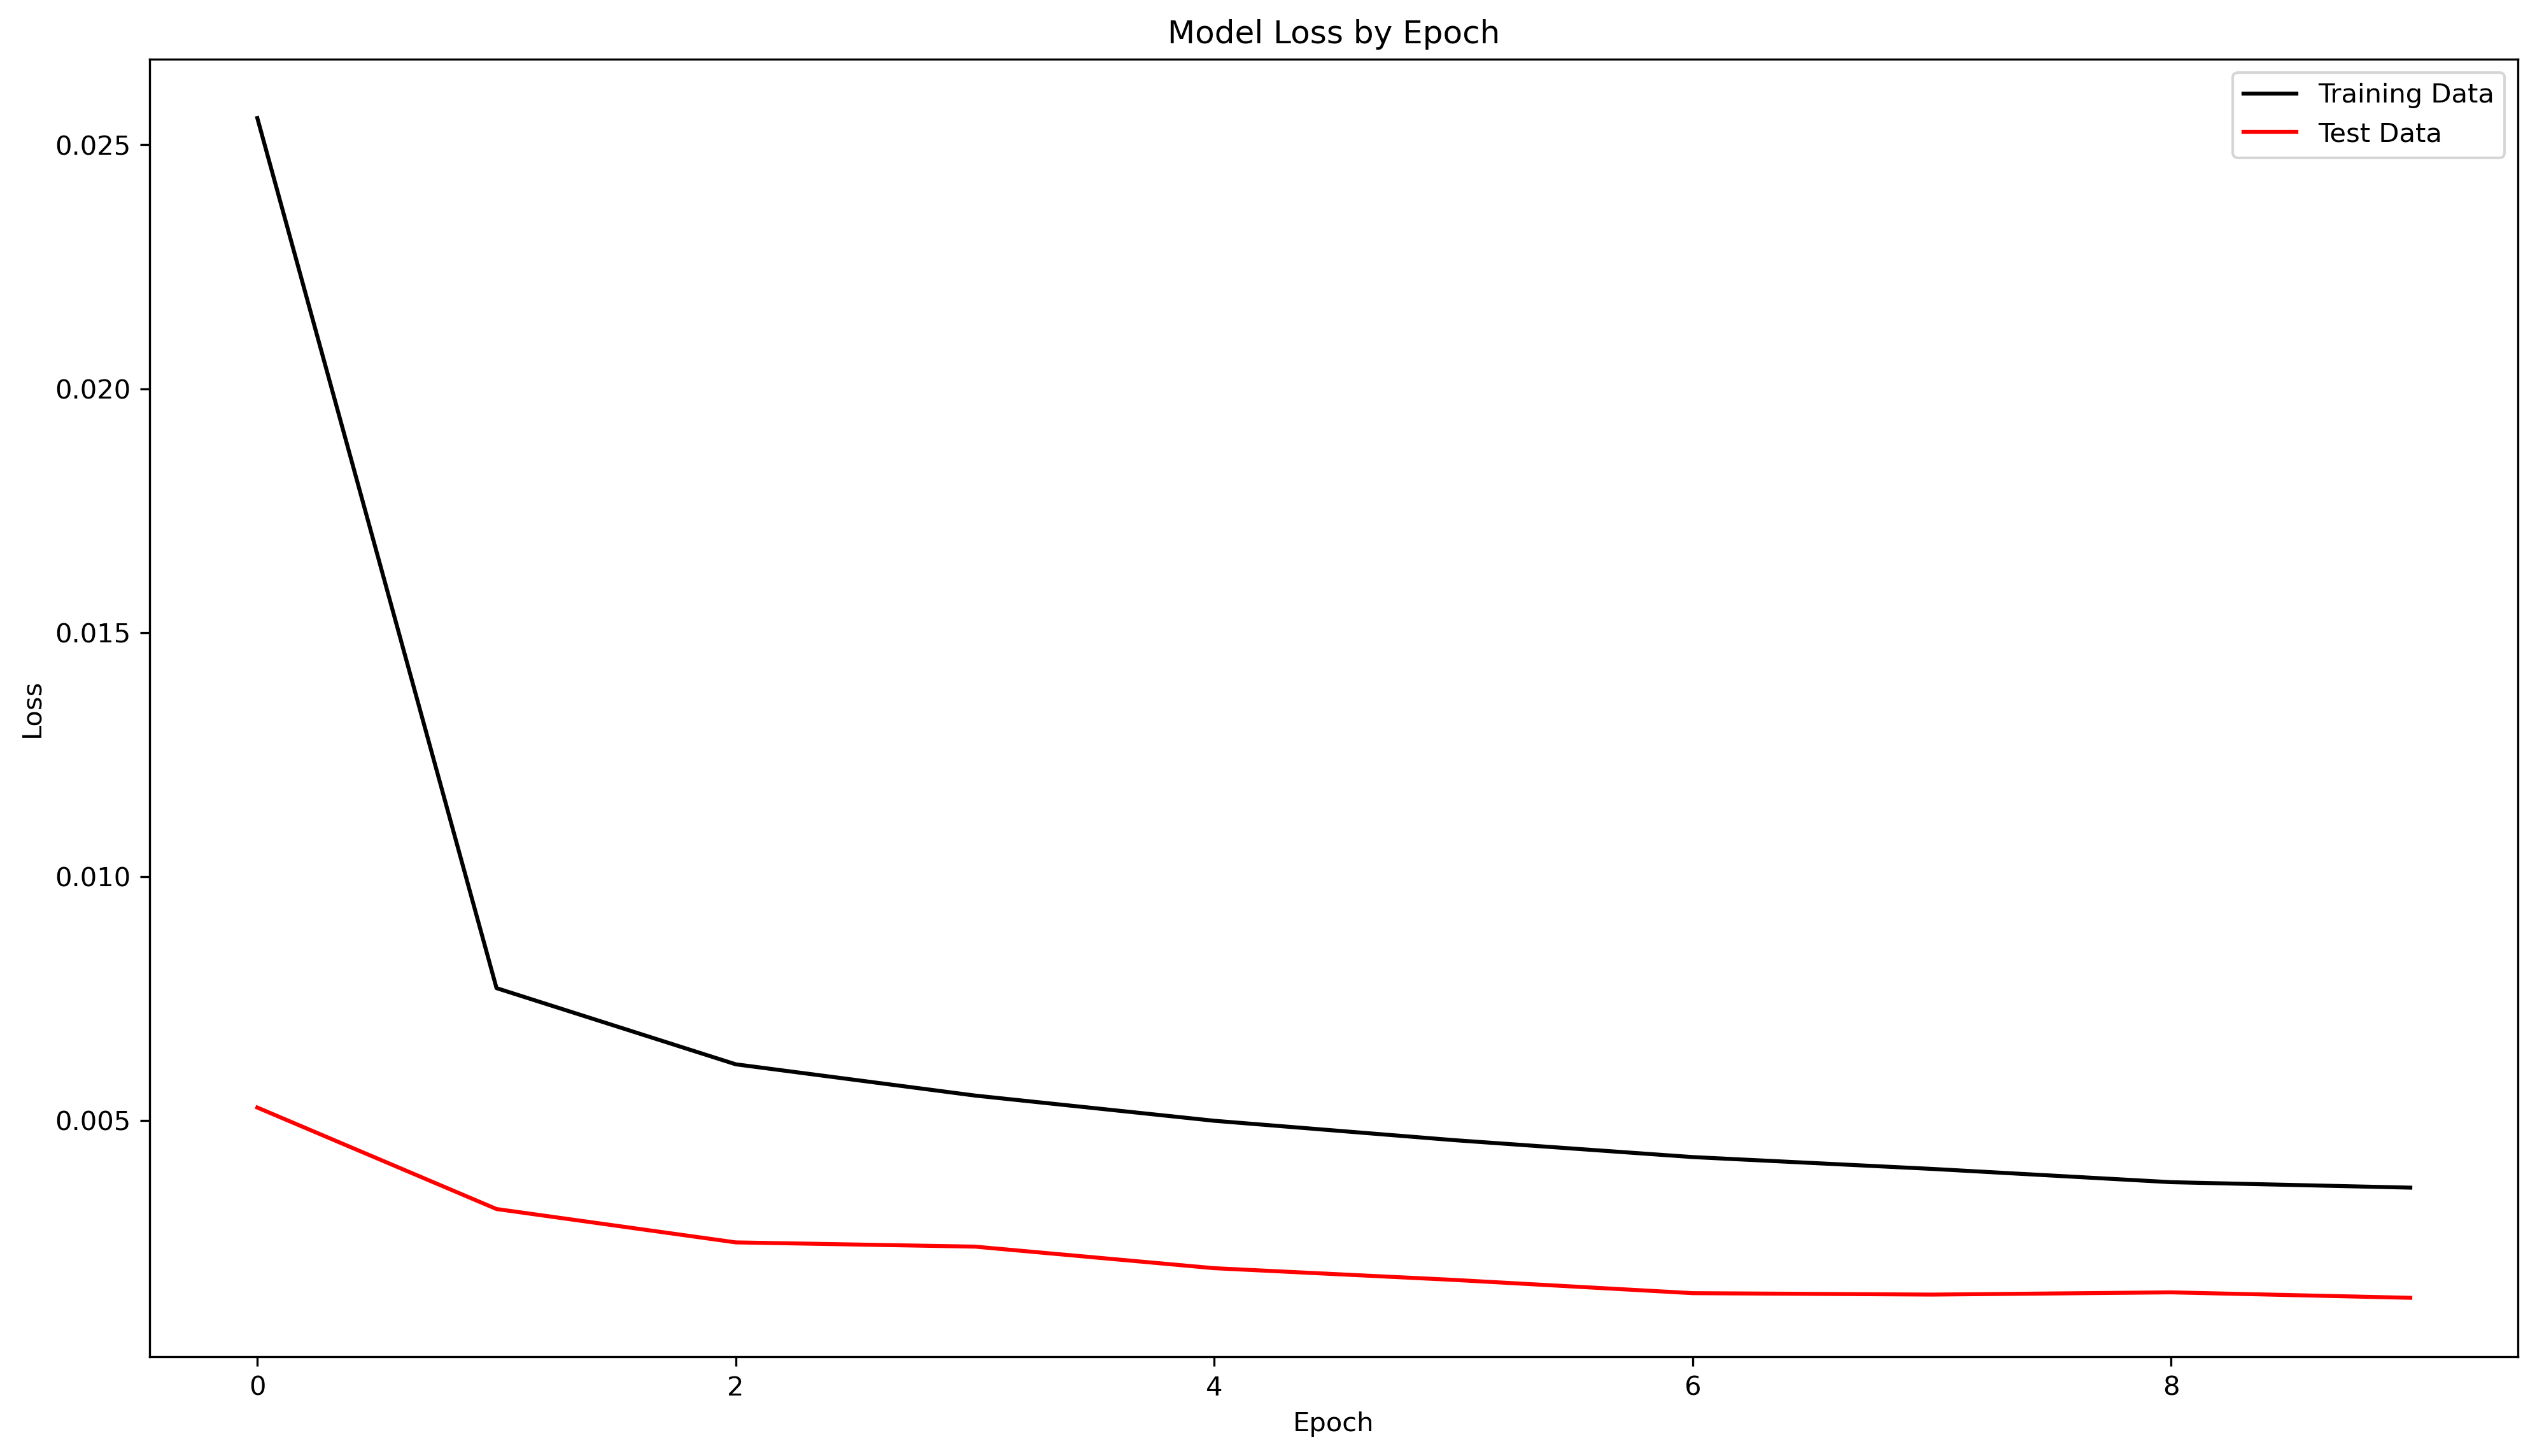

In [40]:
# Plot a loss chart
fig, ax = plt.subplots(figsize=(16,9), dpi=300)
plt.title(label='Model Loss by Epoch', loc='center')

ax.plot(history.history['loss'], label='Training Data', color='black')
ax.plot(history.history['val_loss'], label='Test Data', color='red')
ax.set(xlabel='Epoch', ylabel='Loss')
plt.legend()

plt.show()

# We can see that our Autoencoder model was able to reconstruct the data with only a minimal loss.

# The final part separates Encoder from Decoder and saves the model.

# After training the Undercomplete Autoencoder, we typically discard the Decoder and only use the Encoder part.

In [41]:
# Define an encoder model without the decoder
encoder = Model(inputs=visible, outputs=bottleneck)

# Compile encoder model
encoder.compile(optimizer='adam', loss='mse')

# Save the encoder model to file
encoder.save('C:/Users/Admin/Machine Learning chapter 5/Deep Learning basics with Python/encoder.h5')

Whenever you want to use the encoder model, you can load it and apply it in the way shown below, which takes 17 features (dimensions) and reduces it down to 8:

If required, you can also save the decoder part in the same way by changing inputs = bottlneck and outputs = output within the new decoder model.

In [42]:
# Define an encoder model without the decoder
decoder= Model(inputs= bottleneck, outputs= output)

# Compile encoder model
decoder.compile(optimizer='adam', loss='mse')

# Save the encoder model to file
decoder.save('C:/Users/Admin/Machine Learning chapter 5/Deep Learning basics with Python/decoder.h5')

# Last step - Build two Logistic Regression Models to Predict Tomorrow's Rain Probability

In [43]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'RainTodayFlag'],
      dtype='object')

In [44]:
# Create a flag for RainToday
df['RainTomorrowFlag']=df['RainTomorrow'].apply(lambda x: 1 if x=='Yes' else 0)

In [45]:
# Select data for modeling
X=df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 
      'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',  
      'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTodayFlag']]
y=df['RainTomorrowFlag'].values

# Scale training data so it is between 0 and 1
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(X)

# Create training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
#X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=0)

In [46]:
from sklearn.linear_model import LogisticRegression # for building logistic regression models
from sklearn.metrics import classification_report # for model evaluation metrics

# Baseline - Without Autoencoder

In [47]:
# ----- Without Autoencoder -----

# Fit the model
model1 = LogisticRegression(solver='sag')
clf1 = model1.fit(X_train, y_train)

# Predict class labels on train and test data
pred_labels_tr1 = model1.predict(X_train)
pred_labels_te1 = model1.predict(X_test)


print('****************** Summary ******************')
# Print slope and intercept
print('Intercept (Beta 0): ', clf1.intercept_)
print('Slope (Beta 1): ', clf1.coef_)
print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Test Data ***************')
score_te1 = model1.score(X_test, y_test)
print('Accuracy Score: ', score_te1)
# Look at classification report to evaluate the model
print(classification_report(y_test, pred_labels_te1))
print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Training Data ***************')
score_tr1 = model1.score(X_train, y_train)
print('Accuracy Score: ', score_tr1)
# Look at classification report to evaluate the model
print(classification_report(y_train, pred_labels_tr1))
print('--------------------------------------------------------')

****************** Summary ******************
Intercept (Beta 0):  [-3.09226534]
Slope (Beta 1):  [[-1.64375884  0.4136151   1.72539585 -0.31650471 -2.19306185  6.40969325
  -0.95239582 -1.77084192  0.12797863  5.61072783  4.3178062  -8.19116442
  -0.18668994  1.02643288  0.77099989  1.12884522  0.45918822]]
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.859092520382843
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      8854
           1       0.72      0.56      0.63      2430

    accuracy                           0.86     11284
   macro avg       0.81      0.75      0.77     11284
weighted avg       0.85      0.86      0.85     11284

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.8526896490606168
              precision    recall  f1-score   support

     

In [48]:
X_train.shape, X_test.shape

((45136, 17), (11284, 17))

# We are going to use the encoder model  to reduce the 17 features to 8 features. 

In [49]:
# Load the model from file
encoder = load_model('C:/Users/Admin/Machine Learning chapter 5/Deep Learning basics with Python/encoder.h5')

In [50]:
# Encode train and test data
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

In [51]:
#dimensionality reduction confirmed. 
X_train_encoded.shape, X_test_encoded.shape

((45136, 8), (11284, 8))

In [52]:
# Fit the model
model2 = LogisticRegression(solver='sag')
clf2 = model2.fit(X_train_encoded, y_train)

# Predict class labels on train and test data
pred_labels_tr2 = model2.predict(X_train_encoded)
pred_labels_te2 = model2.predict(X_test_encoded)


print('****************** Summary ******************')
# Print slope and intercept
print('Intercept (Beta 0): ', clf2.intercept_)
print('Slope (Beta 1): ', clf2.coef_)
print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Test Data ***************')
score_te2 = model2.score(X_test_encoded, y_test)
print('Accuracy Score: ', score_te2)
# Look at classification report to evaluate the model
print(classification_report(y_test, pred_labels_te2))
print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Training Data ***************')
score_tr2 = model2.score(X_train_encoded, y_train)
print('Accuracy Score: ', score_tr2)
# Look at classification report to evaluate the model
print(classification_report(y_train, pred_labels_tr2))
print('--------------------------------------------------------')

****************** Summary ******************
Intercept (Beta 0):  [-3.4061396]
Slope (Beta 1):  [[-0.15187614 -0.34256467 -0.04868887  0.19416182  1.9673072   0.8704517
   0.99906653 -2.3073194 ]]
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.8392414037575328
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      8854
           1       0.68      0.47      0.56      2430

    accuracy                           0.84     11284
   macro avg       0.77      0.71      0.73     11284
weighted avg       0.83      0.84      0.83     11284

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.8324397376816731
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     35139
           1       0.68      0.46      0.55      9997

    acc

# In this case the performance of the molde using encoded features is not as good compared to the original features. This indicates a slight loss in the important information following the encoding of the data. However, the performance loss is minimal. 85% vs 83%. Nevertheless, one should way pros and cons of using autoencoders within your model pipeline. Sometimes it may be easier to remove highly correlated or less predictive features upfornt instead of trying to encode them.

In [53]:

# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Model # for creating assembling a Neural Network model
from keras import Input # for instantiating a keras tensor and specifying input dimensions
from keras.layers import Dense, Lambda # adding layers to the Neural Network model
from tensorflow.keras.utils import plot_model # for plotting model diagram
from keras import backend as K # for access to Keras backend for reparameterization and creating custom loss function

# Data manipulation
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

# Visualization
import matplotlib 
import matplotlib.pyplot as plt # for plotting model loss
print('matplotlib: %s' % matplotlib.__version__) # print version
import graphviz # for showing model diagram
print('graphviz: %s' % graphviz.__version__) # print version
import plotly
import plotly.express as px # for data visualization
print('plotly: %s' % plotly.__version__) # print version

# Other utilities
import sys
import os

# Assign main directory to a variable
main_dir=os.path.dirname(sys.path[0])

Tensorflow/Keras: 2.7.0
numpy: 1.22.4
matplotlib: 3.4.3
graphviz: 0.20.1
plotly: 4.14.3


In [54]:
# Load digits data 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [55]:
# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


In [56]:
#here we have 60000 images each image has pixels features to create the number shape. Values of pixels range from 0 to 255 pixels. 
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [57]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [58]:
X_train[0].shape

(28, 28)

In [59]:
#these are the possible number values. 
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [60]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [61]:
# Normalize input data (divide by 255 maximum value), to be between 0 and 1. 
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

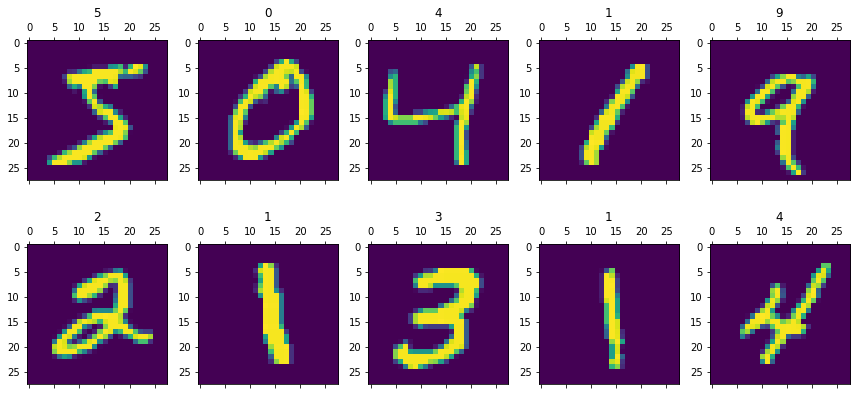

In [62]:
# Display images of the first 10 digits in the training set and their true lables
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
#n is to set the position of each image.
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_train[n])
        axs[i,j].set(title=y_train[n])
        n=n+1
plt.show() 

As you can see, we have 60,000 images in the training set and 10,000 in the test set. Note that their dimensions are 28 x 28 pixels.

The final step in the setup is to flatten the images by reshaping them from 28x28 to 784.

Typically, we would use Convolutional layers instead of flattening images, especially when working with larger pictures. However, I wanted to keep this example simple, hence using Dense layers with flat data instead of Convolutional ones.

In [63]:
# Reshape input data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# Print shapes
print("New shape of X_train: ", X_train.shape)
print("New shape of X_test: ", X_test.shape)

New shape of X_train:  (60000, 784)
New shape of X_test:  (10000, 784)


In [64]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [65]:
#flatten the data to have it in a unique array. 
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [66]:
#--- Create a function, which we will use to randomly sample from latent space distribution
#Reparametrization Trick. Define a sampling function to sample from the distribution. 
# Note, epsilon is sampled from a standard normal distribution and is used to maintain the required stochasticity of Z
# Meanwhile, z-mean and z-sigma remain deterministic allowing the loss to backpropagate through the layers.
#this is to allow the gradient descent to allow for gradient estimation accurately. 
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
    return z_mean + K.exp(z_log_sigma) * epsilon

# Now, we can define the structure of the Encoder model.

In [67]:
# Specify dimensions for input/output and latent space layers
original_dim = 784 # number of neurons at the input layer (28 * 28 = 784)
latent_dim = 2 # latent space dimension

In [68]:
# ********** Create Encoder **********

#--- Input Layer 
visible = keras.Input(shape=(original_dim,), name='Encoder-Input-Layer')

#--- Hidden Layer
h_enc1 = Dense(units=64, activation='relu', name='Encoder-Hidden-Layer-1')(visible)
h_enc2 = Dense(units=16, activation='relu', name='Encoder-Hidden-Layer-2')(h_enc1)
h_enc3 = Dense(units=8, activation='relu', name='Encoder-Hidden-Layer-3')(h_enc2)

#--- Custom Latent Space Layer
z_mean = Dense(units=latent_dim, name='Z-Mean')(h_enc3) # Mean component
z_log_sigma = Dense(units=latent_dim, name='Z-Log-Sigma')(h_enc3) # Standard deviation component
z = Lambda(sampling, name='Z-Sampling-Layer')([z_mean, z_log_sigma]) # Z sampling layer.Here we use the sampling function where sampling(z_mean, z_log_sigma).  
#--- Create Encoder model
encoder = Model(visible, [z_mean, z_log_sigma, z], name='Encoder-Model')

Note how we send the same outputs from the Encoder-Hidden-Layer-3 into Z-Mean and Z-Log-Sigma before recombining them inside a custom Lambda layer (Z-Sampling-Layer), which is used for sampling from the latent space.

Next, we create the Decoder model:

In [69]:

# ********** Create Decoder **********

#--- Input Layer 
latent_inputs = Input(shape=(latent_dim,), name='Input-Z-Sampling')

#--- Hidden Layer
h_dec = Dense(units=8, activation='relu', name='Decoder-Hidden-Layer-1')(latent_inputs)
h_dec2 = Dense(units=16, activation='relu', name='Decoder-Hidden-Layer-2')(h_dec)
h_dec3 = Dense(units=64, activation='relu', name='Decoder-Hidden-Layer-3')(h_dec2)

#--- Output Layer
outputs = Dense(original_dim, activation='sigmoid', name='Decoder-Output-Layer')(h_dec3)

#--- Create Decoder model
decoder = Model(latent_inputs, outputs, name='Decoder-Model')

# As you can see, the decoder is a pretty straightforward model that takes inputs from the latest space and passes them through a few hidden layers before generating values for the 784 output nodes.

# Next, we combine the Encoder and Decoder models to form a Variational Autoencoder model (VAE).

In [70]:
# Define outputs from a VAE model by specifying how the encoder-decoder models are linked
#encoder = Model(visible, [z_mean, z_log_sigma, z], name='Encoder-Model')
outpt = decoder(encoder(visible)[2]) # note, outputs available from encoder model are z_mean, z_log_sigma and z. We take z by specifying [2]
# Instantiate a VAE model
vae = Model(inputs=visible, outputs=outpt, name='VAE-Model')

Custom Loss function
Before training the VAE model, the final step is to create a custom loss function and compile the model.

As mentioned earlier in the article, we will use KL divergence to measure the loss between the latent space distribution and a reference standard Normal distribution. The “KL loss” is in addition to the standard reconstruction loss (in this case, MSE) used to ensure that input and output images remain close.

# Reconstruction loss compares inputs and outputs and tries to minimise the difference

In [71]:
r_loss = original_dim * keras.losses.mse(visible, outpt)  # use MSE

# KL divergence loss compares the encoded latent distribution Z with standard Normal distribution and penalizes if it's too different
kl_loss =  -0.5 * K.sum(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis = 1)

# The VAE loss is a combination of reconstruction loss and KL loss
vae_loss = K.mean(r_loss + kl_loss)

# Add loss to the model and compile it
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

# VAE model training. With the Variational Autoencoder model assembled, let’s train it over 25 epochs and plot the loss chart.

Epoch 1/25
3750/3750 [==============================] - 11s 3ms/step - loss: 48.8341 - val_loss: 43.0764
Epoch 2/25
3750/3750 [==============================] - 11s 3ms/step - loss: 40.6505 - val_loss: 39.4864
Epoch 3/25
3750/3750 [==============================] - 10s 3ms/step - loss: 38.5222 - val_loss: 37.9352
Epoch 4/25
3750/3750 [==============================] - 10s 3ms/step - loss: 37.4527 - val_loss: 37.0298
Epoch 5/25
3750/3750 [==============================] - 9s 2ms/step - loss: 36.7319 - val_loss: 36.6216
Epoch 6/25
3750/3750 [==============================] - 10s 3ms/step - loss: 36.1649 - val_loss: 35.8818
Epoch 7/25
3750/3750 [==============================] - 10s 3ms/step - loss: 35.7358 - val_loss: 35.5645
Epoch 8/25
3750/3750 [==============================] - 10s 3ms/step - loss: 35.3911 - val_loss: 35.4289
Epoch 9/25
3750/3750 [==============================] - 10s 3ms/step - loss: 35.1049 - val_loss: 35.2067
Epoch 10/25
3750/3750 [==============================] -

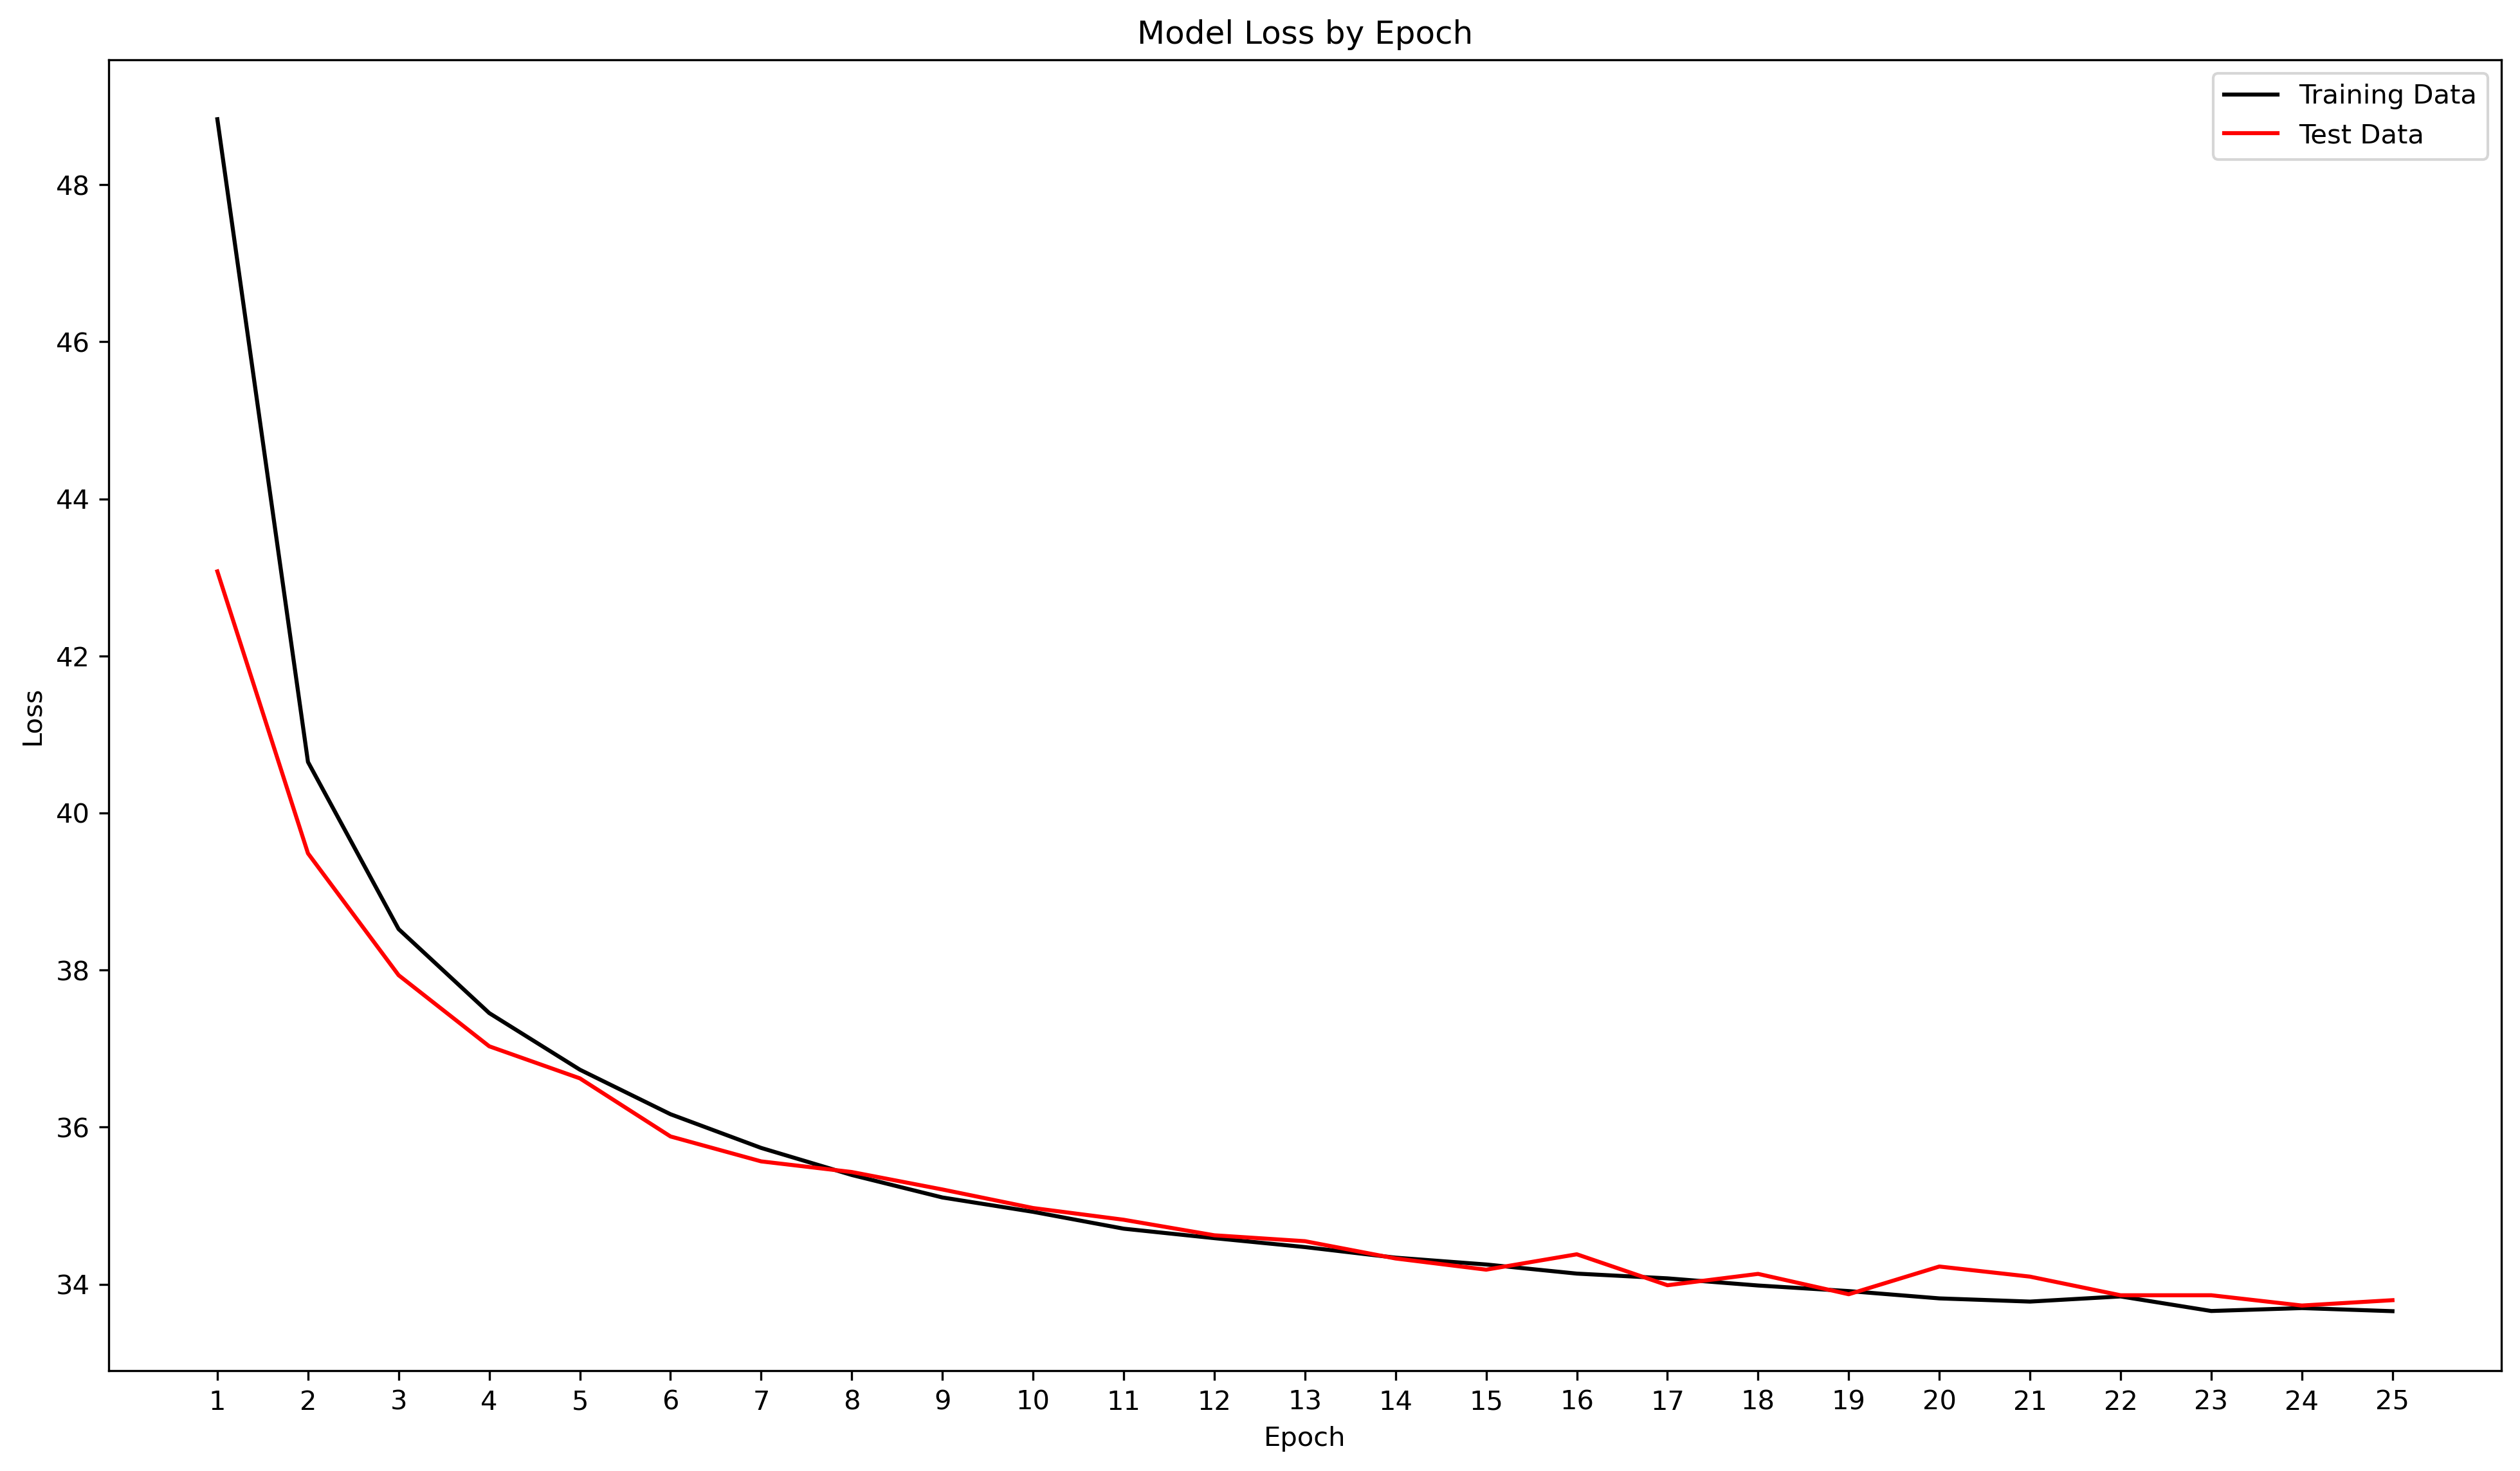

In [72]:

# Train VAE model.# Fit to reconstruct input
history = vae.fit(X_train, X_train, epochs=25, batch_size=16, validation_data=(X_test, X_test))

# Plot a loss chart
fig, ax = plt.subplots(figsize=(16,9), dpi=300)
plt.title(label='Model Loss by Epoch', loc='center')

ax.plot(history.history['loss'], label='Training Data', color='black')
ax.plot(history.history['val_loss'], label='Test Data', color='red')
ax.set(xlabel='Epoch', ylabel='Loss')
plt.xticks(ticks=np.arange(len(history.history['loss']), step=1), labels=np.arange(1, len(history.history['loss'])+1, step=1))
plt.legend()
plt.show()

# After the training process we use the encoder part to check how the digits are represented in the 2d Z distribution space. 

In [73]:
# Use encoder model to encode inputs into a latent space
X_test_encoded = encoder.predict(X_test)

# Recall that our encoder returns 3 arrays: z-mean, z-log-sigma and z. We plot the values for z
# Create a scatter plot
fig = px.scatter(None, x=X_test_encoded[2][:,0], y=X_test_encoded[2][:,1], 
                 opacity=1, color=y_test.astype(str))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='white', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='white', 
                 showline=True, linewidth=1, linecolor='white',
                 title_font=dict(size=10), tickfont=dict(size=10))

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='white', 
                 showline=True, linewidth=1, linecolor='white',
                 title_font=dict(size=10), tickfont=dict(size=10))

# Set figure title
fig.update_layout(title_text="MNIST digit representation in the 2D Latent Space")

# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()

# Plotting the digit distribution in the latent space gives us the benefit of visually associating different regions with different digits.

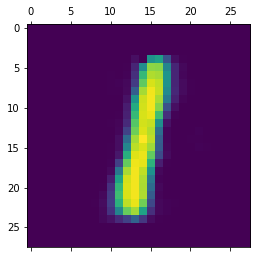

In [81]:
# Input latent space coordinates
z_sample_digit=[[0,1]]

# Decode latent inputs (i.e., generate new outputs)
digit_decoded = decoder.predict(z_sample_digit)

# Reshape and display the image
plt.matshow(digit_decoded.reshape(28,28))
plt.show()

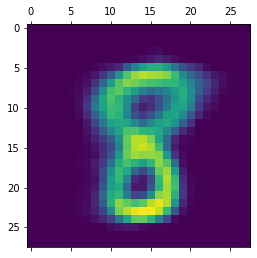

In [82]:
#Input latent space coordinates
z_sample_digit=[[0,0]]
#here you find a 1. 
# Decode latent inputs (i.e., generate new outputs)
digit_decoded = decoder.predict(z_sample_digit)

# Reshape and display the image
plt.matshow(digit_decoded.reshape(28,28))
plt.show()

# Let’s now generate 900 new digits from across the whole latent space.

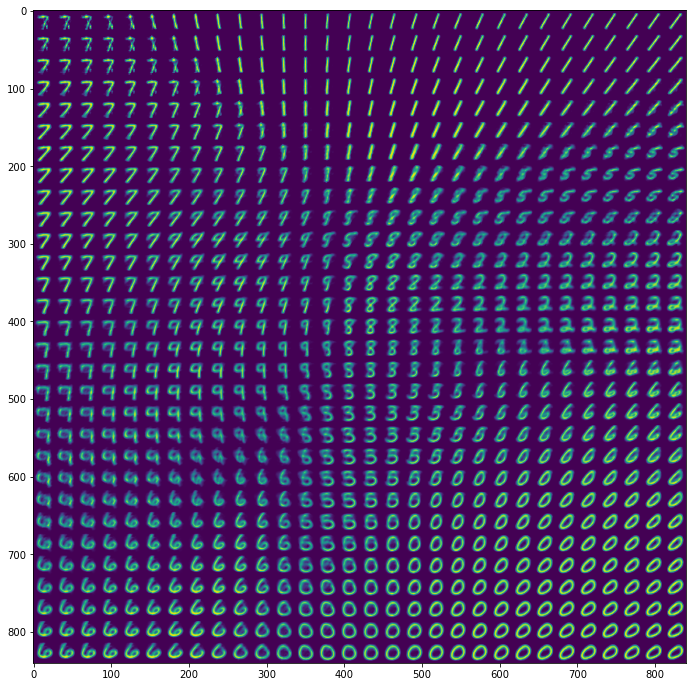

In [84]:

# Display a 2D manifold of the digits
n = 30  # figure with 30x30 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

# We will sample n points within [-1.5, 1.5] standard deviations
grid_x = np.linspace(1.5, -1.5, n)
grid_y = np.linspace(-1.5, 1.5, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        # Generate an image using a decoder model
        #when we sample a point from such latent space, we generate new data closely resembling the training data.
        x_decoded = decoder.predict(z_sample)
        #x_decoded = np.clip(x_decoded, 0.25, 0.75) # we could use cliping to make digit edges thicker
        
        # Reshape from 784 to original digit size (28x28)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

# Plot figure
plt.figure(figsize=(15, 12))
plt.imshow(figure)
plt.show()

# Sparse Autoencoders (SAE)

In [85]:
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for adding Dense layers to AE model
from keras.models import Model # for creating a Neural Network Autoencoder model


# Data manipulation
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version


# Visualization
import matplotlib 
import matplotlib.pyplot as plt # for plotting model loss
print('matplotlib: %s' % matplotlib.__version__) # print version
import seaborn as sns # for plotting neuron heatmap
print('seaborn: %s' % sns.__version__) # print version


# Other utilities
import sys
import os

# Assign main directory to a variable
main_dir=os.path.dirname(sys.path[0])

Tensorflow/Keras: 2.7.0
numpy: 1.22.4
matplotlib: 3.4.3
seaborn: 0.11.2


Next, we load MNIST handwritten digit data and display the first ten digits. We will use digit labels (y_train, y_test) in visualisations but not for model training.



Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


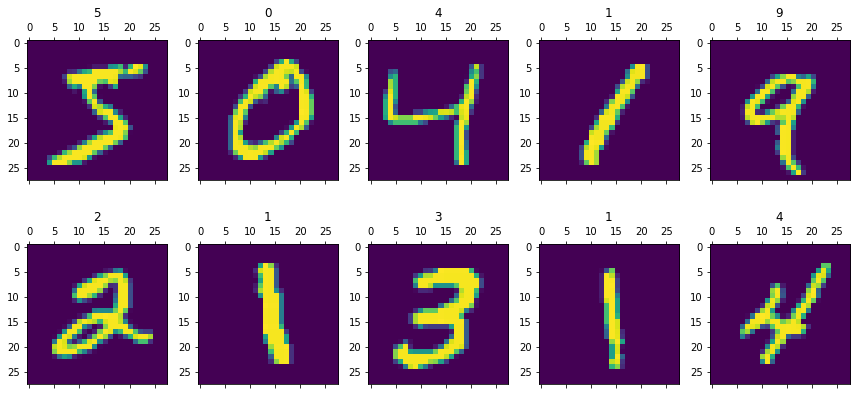

In [86]:
# Load digits data 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

# Display images of the first 10 digits in the training set and their true lables
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_train[n])
        axs[i,j].set(title=y_train[n])
        n=n+1
plt.show() 

As you can see, we have 60,000 images in the training set and 10,000 in the test set. Note that their dimensions are 28 x 28 pixels. To keep this example simple, we will not use Convolutional layers but instead flatten the images so we can pass them through Dense fully-connected layers.

In [87]:
# Reshape and normalize (divide by 255) input data, to be between 0 and 1. 
X_train = X_train.reshape(60000, 784).astype("float32") / 255
X_test = X_test.reshape(10000, 784).astype("float32") / 255

# Print shapes
print("New shape of X_train: ", X_train.shape)
print("New shape of X_test: ", X_test.shape)

New shape of X_train:  (60000, 784)
New shape of X_test:  (10000, 784)


Building Autoencoder models
We will build two autoencoder models to make it easier to see the difference between neuron activations in the Undercomplete AE and Sparse AE.

We start with Undercomplete AE. Here are the key things to pay attention to:

The model consists of 5 layers: one input, three hidden and one output.
Input and output layers contain 784 neurons each (the shape of our data), with the size of hidden layers reduced to 16 neurons each.
We will train the model over 50 epochs and plot a loss chart (see below).

In [88]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [89]:
X_train.shape

(60000, 784)

# Build an Auto Encoder Model. 

In [91]:
#----------- Build AE Model ----------#

# Shapes
AE_n_inputs=X_train.shape[1] #--- No. of neurons for the input and output layers,that is 784.
AE_n_hidden=16 #--- No. of neurons for the hidden layers (including bottleneck)

# Note that input data has 784 neurons while Bottleneck, hidden layer, is reduced to 16 neurons

In [92]:
# Layers
AE_visible = Input(shape=(AE_n_inputs,), name='AE-Input-Layer') #--- Input-Layer 
AE_enc_hidden = Dense(units=AE_n_hidden, activation='relu', name='AE-Encoder-Hidden-Layer')(AE_visible) #--- Encoder-Hidden-Layer 
AE_bottleneck = Dense(units=AE_n_hidden, activation='relu', name='AE-Bottleneck-Layer')(AE_enc_hidden) #--- Bottleneck-Layer
AE_dec_hidden = Dense(units=AE_n_hidden, activation='relu', name='AE-Decoder-Hidden-Layer')(AE_bottleneck) #--- Decoder-Hidden-Layer 
AE_output = Dense(units=AE_n_inputs, activation='sigmoid', name='AE-Output-Layer')(AE_dec_hidden) #--- Output-Layer

# Define autoencoder model
AE_model = Model(inputs=AE_visible, outputs=AE_output, name='Autoencoder-Model')

# Compile autoencoder model
AE_model.compile(optimizer='adam', loss='mse')

# Print model summary
print(AE_model.summary())

Model: "Autoencoder-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 AE-Input-Layer (InputLayer)  [(None, 784)]            0         
                                                                 
 AE-Encoder-Hidden-Layer (De  (None, 16)               12560     
 nse)                                                            
                                                                 
 AE-Bottleneck-Layer (Dense)  (None, 16)               272       
                                                                 
 AE-Decoder-Hidden-Layer (De  (None, 16)               272       
 nse)                                                            
                                                                 
 AE-Output-Layer (Dense)     (None, 784)               13328     
                                                                 
Total params: 26,432
Trainable params: 26,432
Non

In [93]:
# Fit the autoencoder model to reconstruct input
AE_history = AE_model.fit(X_train, X_train, epochs=50, batch_size=16, verbose=1, validation_data=(X_test, X_test))

Epoch 1/50
3750/3750 [==============================] - 6s 1ms/step - loss: 0.0434 - val_loss: 0.0329
Epoch 2/50
3750/3750 [==============================] - 6s 1ms/step - loss: 0.0309 - val_loss: 0.0284
Epoch 3/50
3750/3750 [==============================] - 7s 2ms/step - loss: 0.0283 - val_loss: 0.0273
Epoch 4/50
3750/3750 [==============================] - 7s 2ms/step - loss: 0.0276 - val_loss: 0.0269
Epoch 5/50
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0271 - val_loss: 0.0263
Epoch 6/50
3750/3750 [==============================] - 7s 2ms/step - loss: 0.0267 - val_loss: 0.0260
Epoch 7/50
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0264 - val_loss: 0.0259
Epoch 8/50
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0262 - val_loss: 0.0259
Epoch 9/50
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0261 - val_loss: 0.0257
Epoch 10/50
3750/3750 [==============================] - 6s 2ms/step - loss: 0.026

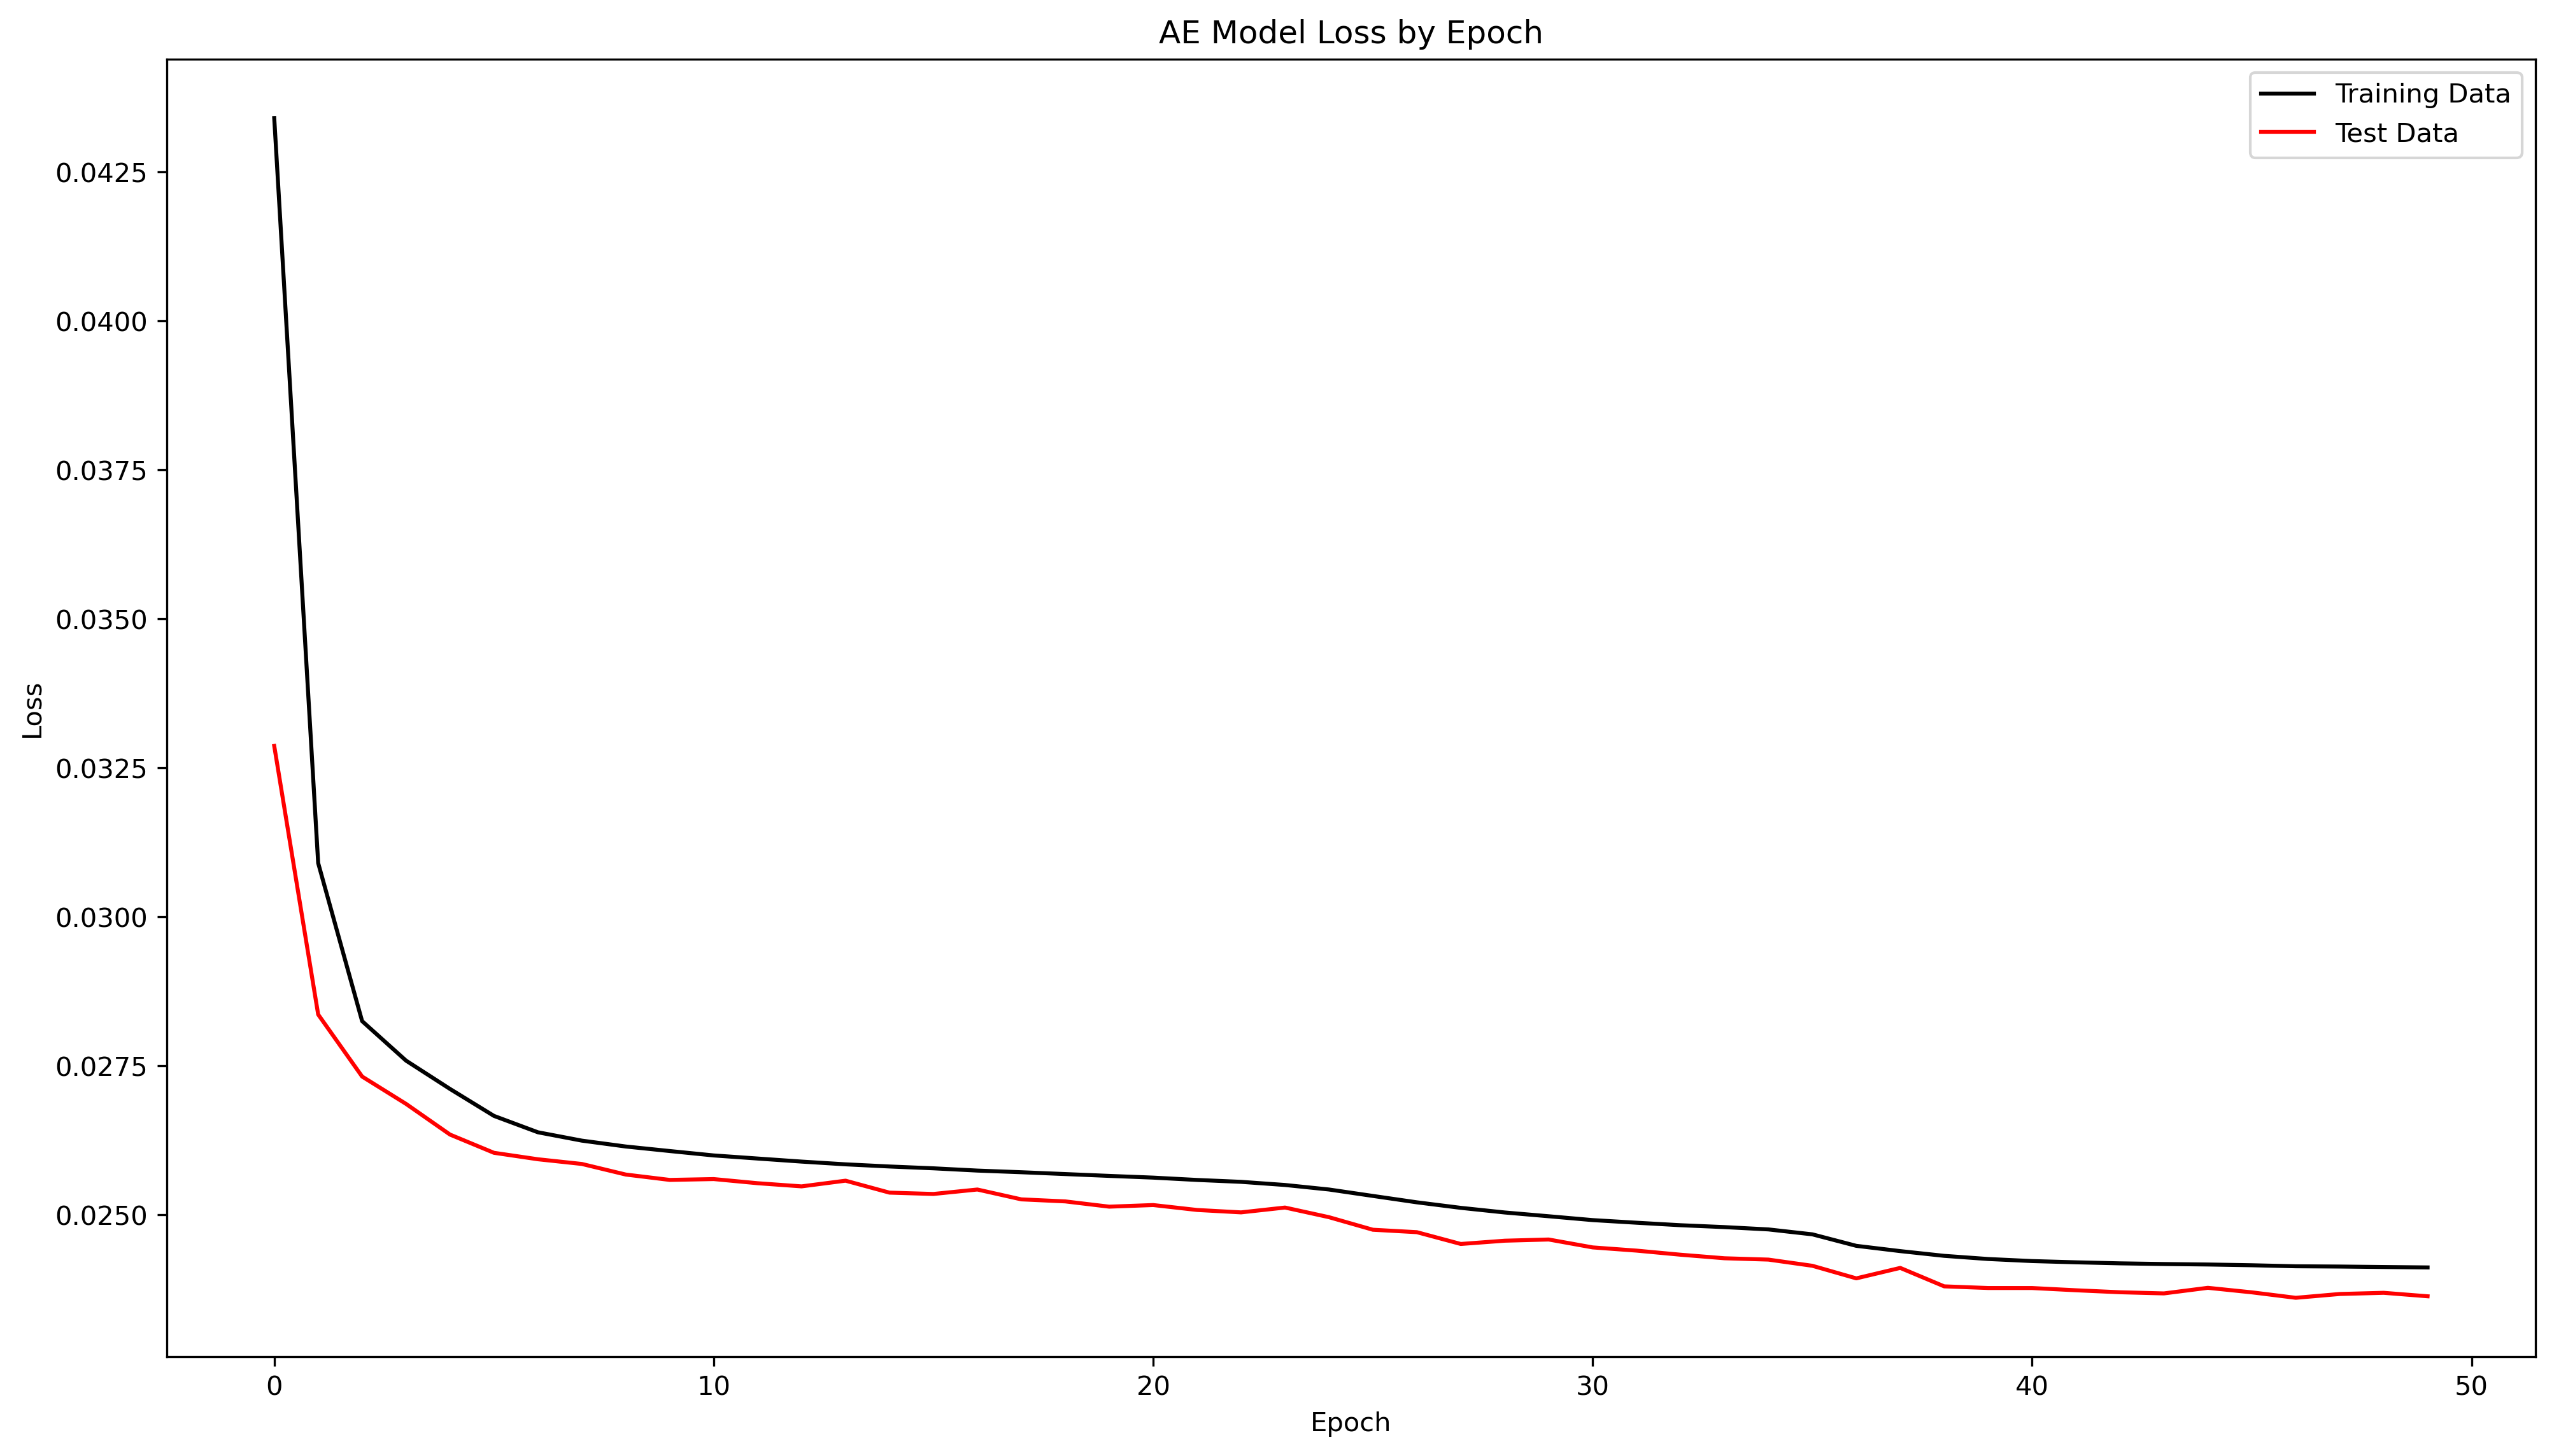

In [94]:
#---------- Plot a loss chart ----------#
fig, ax = plt.subplots(figsize=(16,9), dpi=300)
plt.title(label='AE Model Loss by Epoch', loc='center')
ax.plot(AE_history.history['loss'], label='Training Data', color='black')
ax.plot(AE_history.history['val_loss'], label='Test Data', color='red')
ax.set(xlabel='Epoch', ylabel='Loss')
plt.legend()
plt.show()

# We use the encoder part after we minimize the loss as the input data is reduced in dimension compared to the original in order to predict new images. 

In [115]:
#----------- Save AE Encoder Model ----------#

# Define an encoder model without the decoder
AE_encoder = Model(inputs=AE_visible, outputs=AE_bottleneck)

# Compile encoder model
AE_encoder.compile(optimizer='adam', loss='mse')

# Now let’s build a Sparse autoencoder model. We keep the parameters unchanged for easy comparison between the two models. The only difference is the addition of L1 regularization to the bottleneck layer. Also, please notice that we apply regularization on the neuron activation (activity_regularizer), not the weights (kernel_regularizer).

# ---------------------------------------------------------------------------------------------------------------

# Build SAE Model

In [95]:
#----------- Build SAE Model ----------#

# Shapes
SAE_n_inputs=X_train.shape[1] #--- No. of neurons for the input and output layers
SAE_n_hidden=16 #--- No. of neurons for the hidden layers (including bottleneck)

# Layers
SAE_visible = Input(shape=(SAE_n_inputs,), name='SAE-Input-Layer') #--- Input-Layer 
SAE_enc_hidden = Dense(units=SAE_n_hidden, activation='relu', name='SAE-Encoder-Hidden-Layer')(SAE_visible) #--- Encoder-Hidden-Layer
# Instead of (or in addition to) relying on fewer neurons, SAE uses regularisation to enforce sparsity.
#By sparsity, we mean that fewer neurons can be activated at the same time, creating an information bottleneck similar to that of Unercomplete AE. 
SAE_bottleneck = Dense(units=SAE_n_hidden, activation='relu', activity_regularizer=keras.regularizers.L1(0.0001), name='SAE-Bottleneck-Layer')(SAE_enc_hidden) #--- Bottleneck-Layer
SAE_dec_hidden = Dense(units=SAE_n_hidden, activation='relu', name='SAE-Decoder-Hidden-Layer')(SAE_bottleneck) #--- Decoder-Hidden-Layer 
SAE_output = Dense(units=SAE_n_inputs, activation='sigmoid', name='SAE-Output-Layer')(SAE_dec_hidden) #--- Output-Layer

In [96]:
# Define Sparse autoencoder model
SAE_model = Model(inputs=SAE_visible, outputs=SAE_output, name='Sparse-Autoencoder-Model')

# Compile Sparse autoencoder model
SAE_model.compile(optimizer='adam', loss='mse')

# Print model summary
print(SAE_model.summary())
#params are the total of weights and biases of the whole layer. 
#for example the SAE-Output-Layer has as input 16 neurons and 784 out neurons. 16*784 = 12544 total weights + biases(one for each neuron)784 = 13.328 

Model: "Sparse-Autoencoder-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 SAE-Input-Layer (InputLayer  [(None, 784)]            0         
 )                                                               
                                                                 
 SAE-Encoder-Hidden-Layer (D  (None, 16)               12560     
 ense)                                                           
                                                                 
 SAE-Bottleneck-Layer (Dense  (None, 16)               272       
 )                                                               
                                                                 
 SAE-Decoder-Hidden-Layer (D  (None, 16)               272       
 ense)                                                           
                                                                 
 SAE-Output-Layer (Dense)    (None, 784)  

In [97]:
# Fit the Sparse autoencoder model to reconstruct input
SAE_history = SAE_model.fit(X_train, X_train, epochs=50, batch_size=16, verbose=1, validation_data=(X_test, X_test))

Epoch 1/50
3750/3750 [==============================] - 6s 1ms/step - loss: 0.0476 - val_loss: 0.0337
Epoch 2/50
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0323 - val_loss: 0.0300
Epoch 3/50
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0293 - val_loss: 0.0283
Epoch 4/50
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0281 - val_loss: 0.0275
Epoch 5/50
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0276 - val_loss: 0.0269
Epoch 6/50
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0272 - val_loss: 0.0266
Epoch 7/50
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0269 - val_loss: 0.0264
Epoch 8/50
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0267 - val_loss: 0.0263
Epoch 9/50
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0265 - val_loss: 0.0261
Epoch 10/50
3750/3750 [==============================] - 6s 2ms/step - loss: 0.026

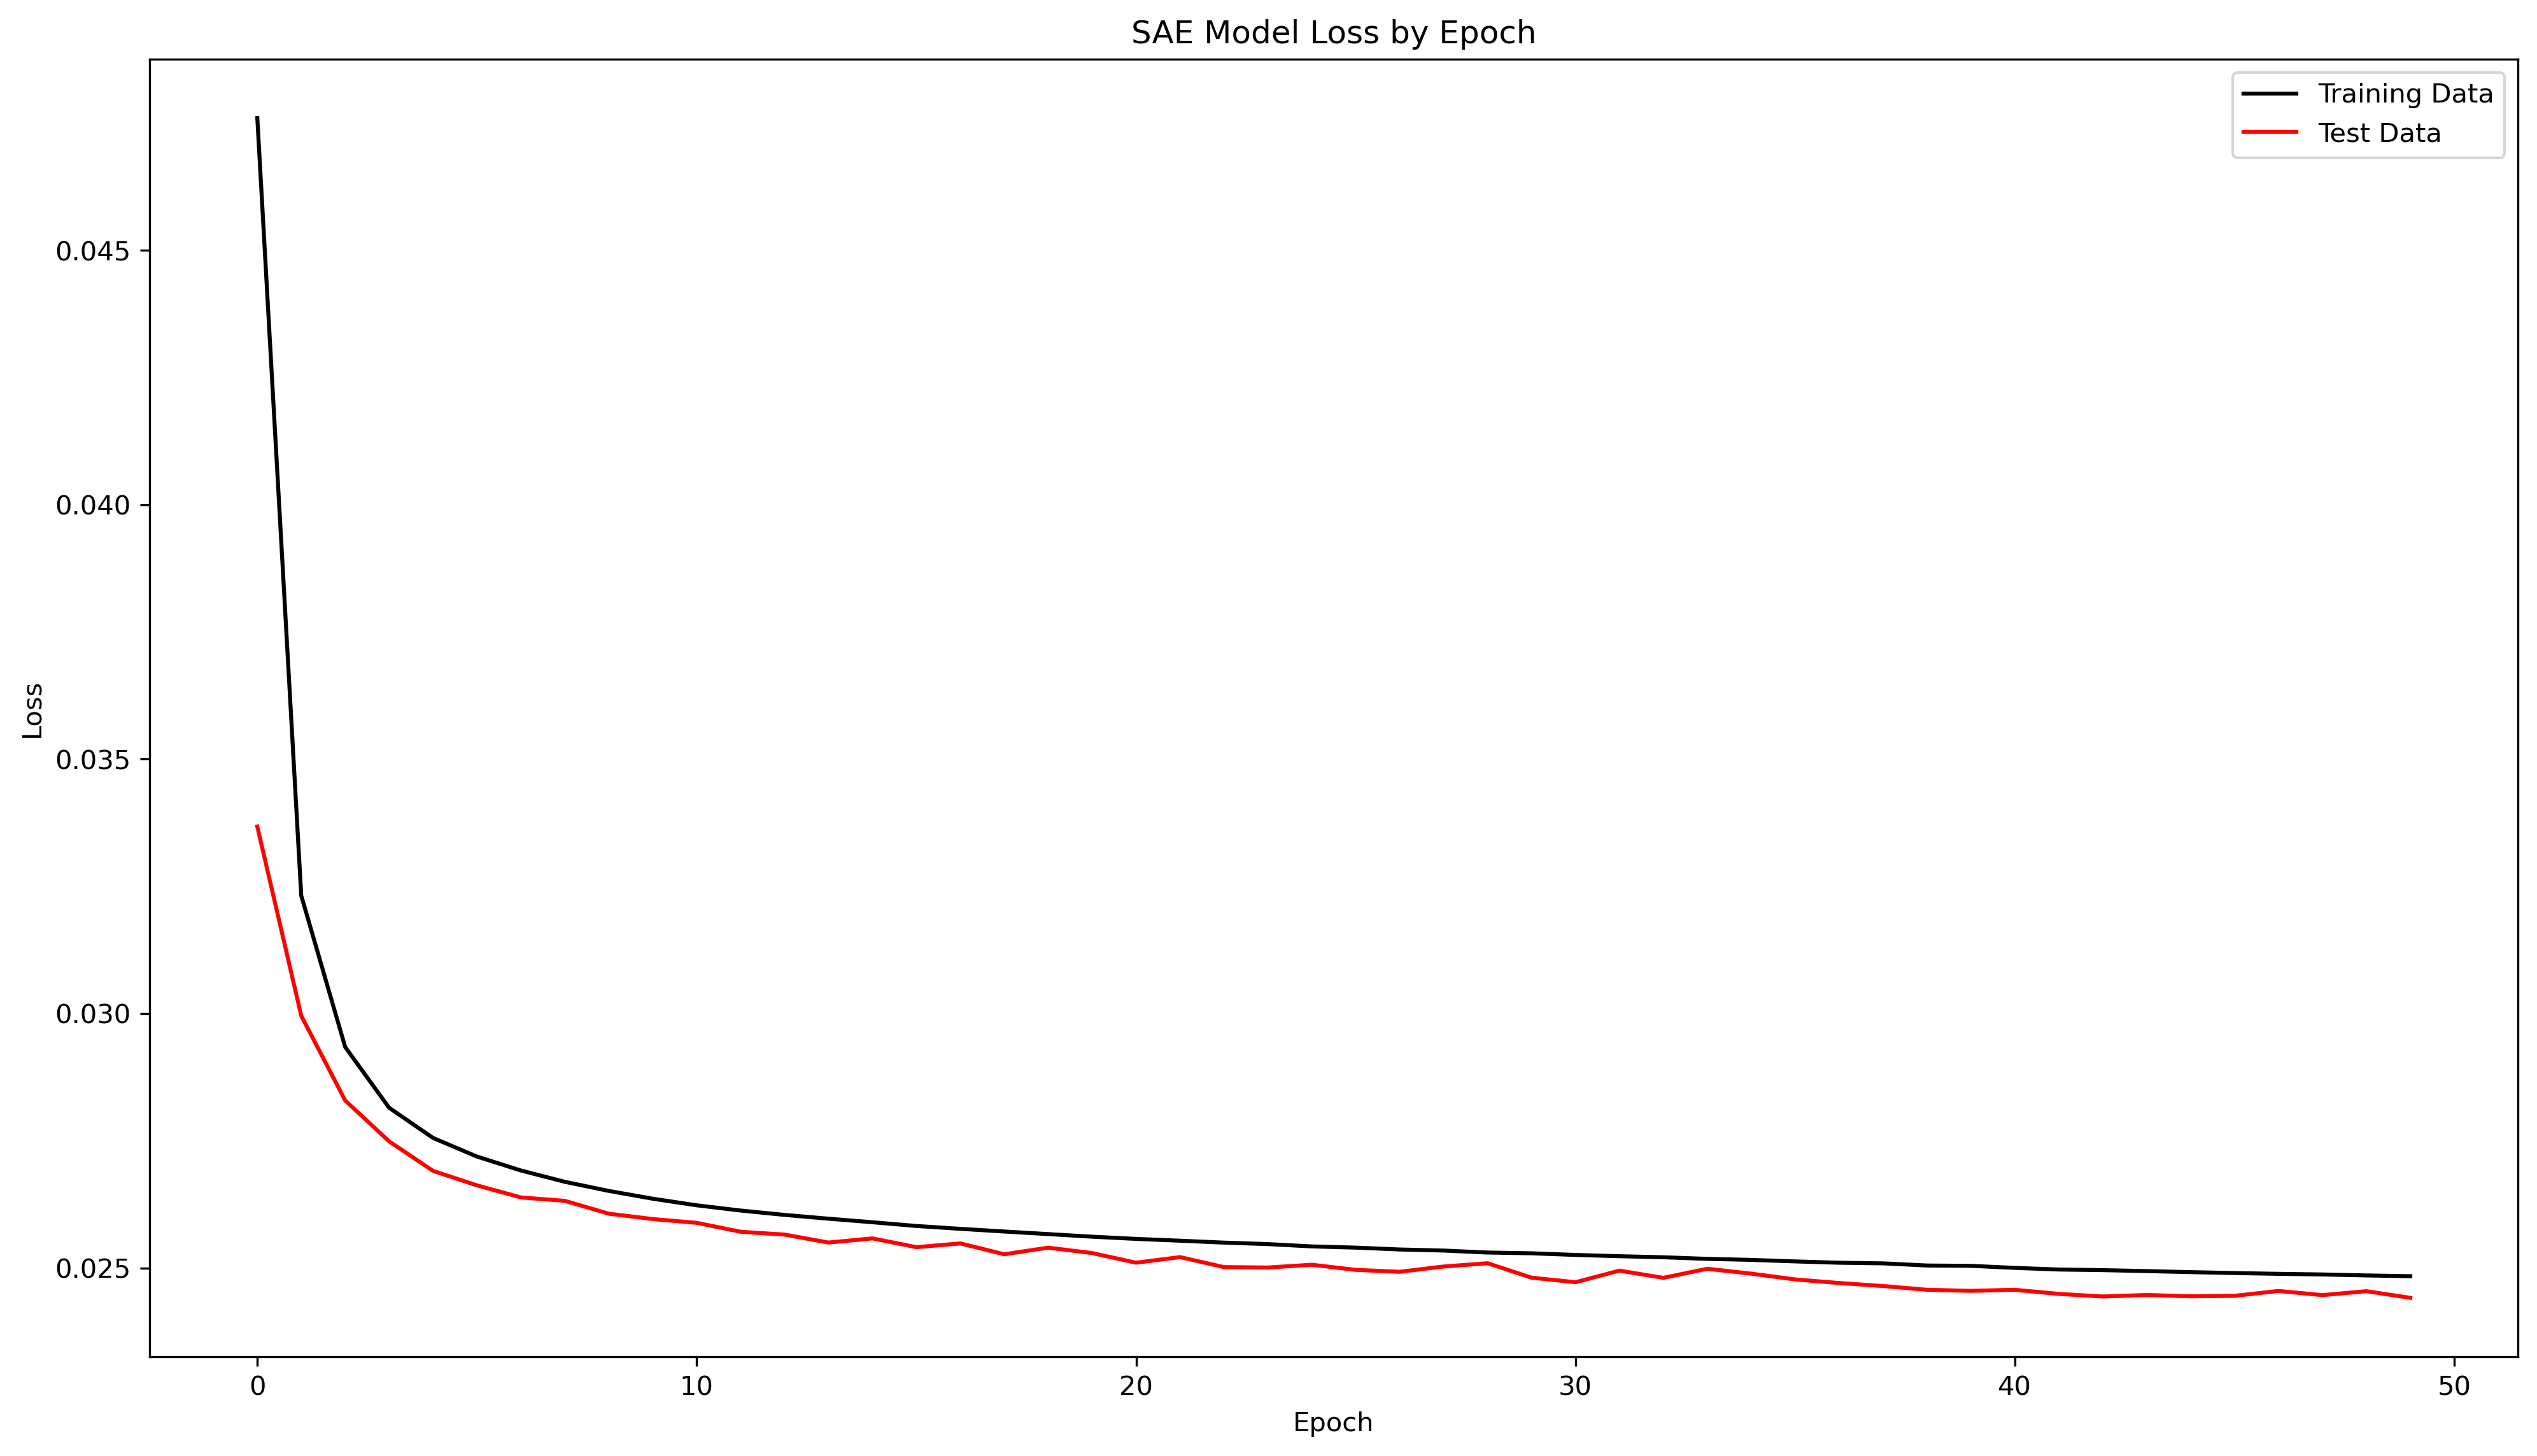

In [98]:
#---------- Plot a loss chart ----------#
fig, ax = plt.subplots(figsize=(16,9), dpi=300)
plt.title(label='SAE Model Loss by Epoch', loc='center')
ax.plot(SAE_history.history['loss'], label='Training Data', color='black')
ax.plot(SAE_history.history['val_loss'], label='Test Data', color='red')
ax.set(xlabel='Epoch', ylabel='Loss')
plt.legend()
plt.show()

In [99]:
#----------- Save SAE Encoder Model ----------#
#we will use it to create predictions from the encode data using the X_test data. 
# Define an encoder model without the decoder
SAE_encoder = Model(inputs=SAE_visible, outputs=SAE_bottleneck)

# Compile encoder model
SAE_encoder.compile(optimizer='adam', loss='mse')

# Recall from earlier that different inputs will lead to an activation of different neurons. Hence, let’s pick one of each digit from the MNIST test set to represent the broad scale of inputs. Note that we need to reshape the array back from 784 to (28 x 28) to enable us to display the images. 

In [100]:
X_test.shape

(10000, 784)

In [101]:
# Reshape back
X_test_back = X_test.reshape(10000, 28, 28)

In [102]:
#these are the indexes to receive the numbers: 0,1,2,3,4,5,6,7,8,9.
imglist=[3,2,1,32,4,15,21,0,61,9]

In [103]:
X_test_back[3]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Verification: 

In [104]:
y_test[3]

0

In [105]:
y_test[2]

1

In [106]:
y_test[1]

2

In [107]:
y_test[32]

3

Step 4 - Display images processed by AE and SAE models
Original images

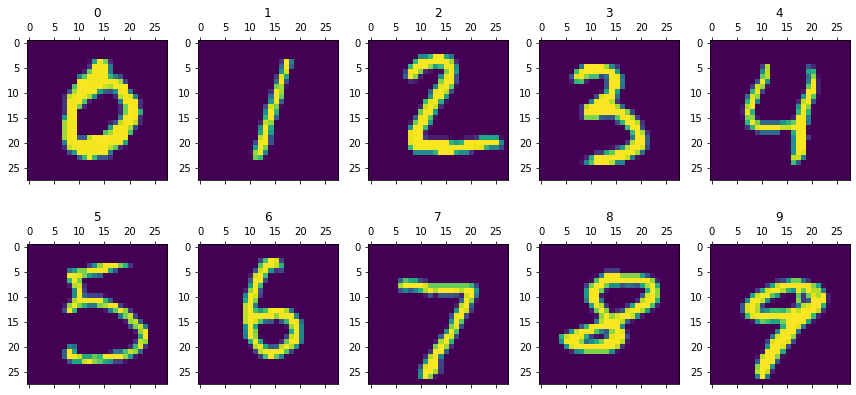

In [108]:
# Display select images of digits in the testing set and their true lables
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
imglist=[3,2,1,32,4,15,21,0,61,9]
n=0
for i in range(0,2):
    for j in range(0,5):
        k=imglist[n]
        axs[i,j].matshow(X_test_back[k])
        axs[i,j].set(title=y_test[k])
        n=n+1
plt.show() 

# Images processed by AE. First Ten digits. 

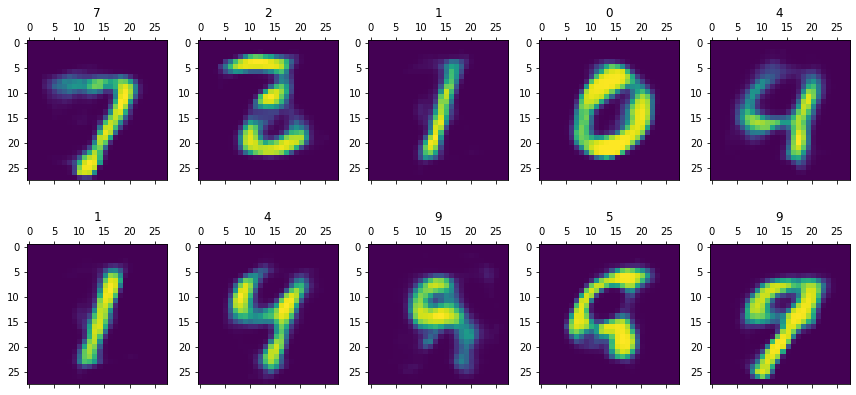

In [109]:
# Process images with Autoencoder. Choose to plot the first 10. 
for i in range(0, 10):
    img=AE_model.predict(X_test[i].reshape(1,784))
    if i==0: 
        processed_imgs=np.copy(img) 
    else:
        processed_imgs=np.concatenate((processed_imgs, img))
processed_imgs=processed_imgs.reshape(10, 28, 28)

# Display processed images
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(processed_imgs[n])
        axs[i,j].set(title=y_test[n])
        n=n+1
plt.show() 

# Images processed by SAE. First Ten digits

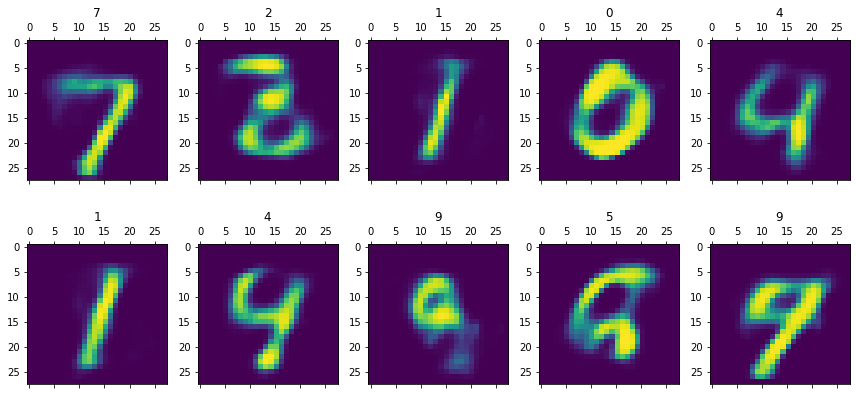

In [112]:
# Process images with Sparse-Autoencoder
for i in range(0, 10):
    img=SAE_model.predict(X_test[i].reshape(1,784))
    if i==0: 
        processed_imgs=np.copy(img) 
    else:
        processed_imgs=np.concatenate((processed_imgs, img))
processed_imgs=processed_imgs.reshape(10, 28, 28)

# Display processed images
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(processed_imgs[n])
        axs[i,j].set(title=y_test[n])
        n=n+1
plt.show()

# Now let’s use the encoder parts of each model (AE and SAE) to encode the above images.

In [113]:
#this indexes in the x_test has the images 0,1,2,3,4,5,6,7,8,9
imglist=[3,2,1,32,4,15,21,0,61,9]

In [116]:
# Encode images with AE encoder
for i in imglist:
    enc=AE_encoder.predict(X_test[i].reshape(1,784))
    if i==imglist[0]: 
        AE_encoded_imgs=np.copy(enc) 
    else:
        AE_encoded_imgs=np.concatenate((AE_encoded_imgs, enc))
#AE_encoded_imgs

In [117]:
#10 digits, 16 neurons in th bottleneck layer. 
AE_encoded_imgs.shape

(10, 16)

In [118]:
# Encode images with SAE encoder
for i in imglist:
    enc=SAE_encoder.predict(X_test[i].reshape(1,784))
    if i==imglist[0]: 
        SAE_encoded_imgs=np.copy(enc) 
    else:
        SAE_encoded_imgs=np.concatenate((SAE_encoded_imgs, enc))
#SAE_encoded_imgs

In [119]:
#10 digits, 16 neurons in th bottleneck layer. 
SAE_encoded_imgs.shape

(10, 16)

# After encoding, we plot a heatmap that shows which neurons in the bottleneck got activated (≠ 0). Rows are neurons, while columns are the digits (0–9).

# the bottleneck layer for both models have 16 neurons and imglist has the 10 unique digits. 

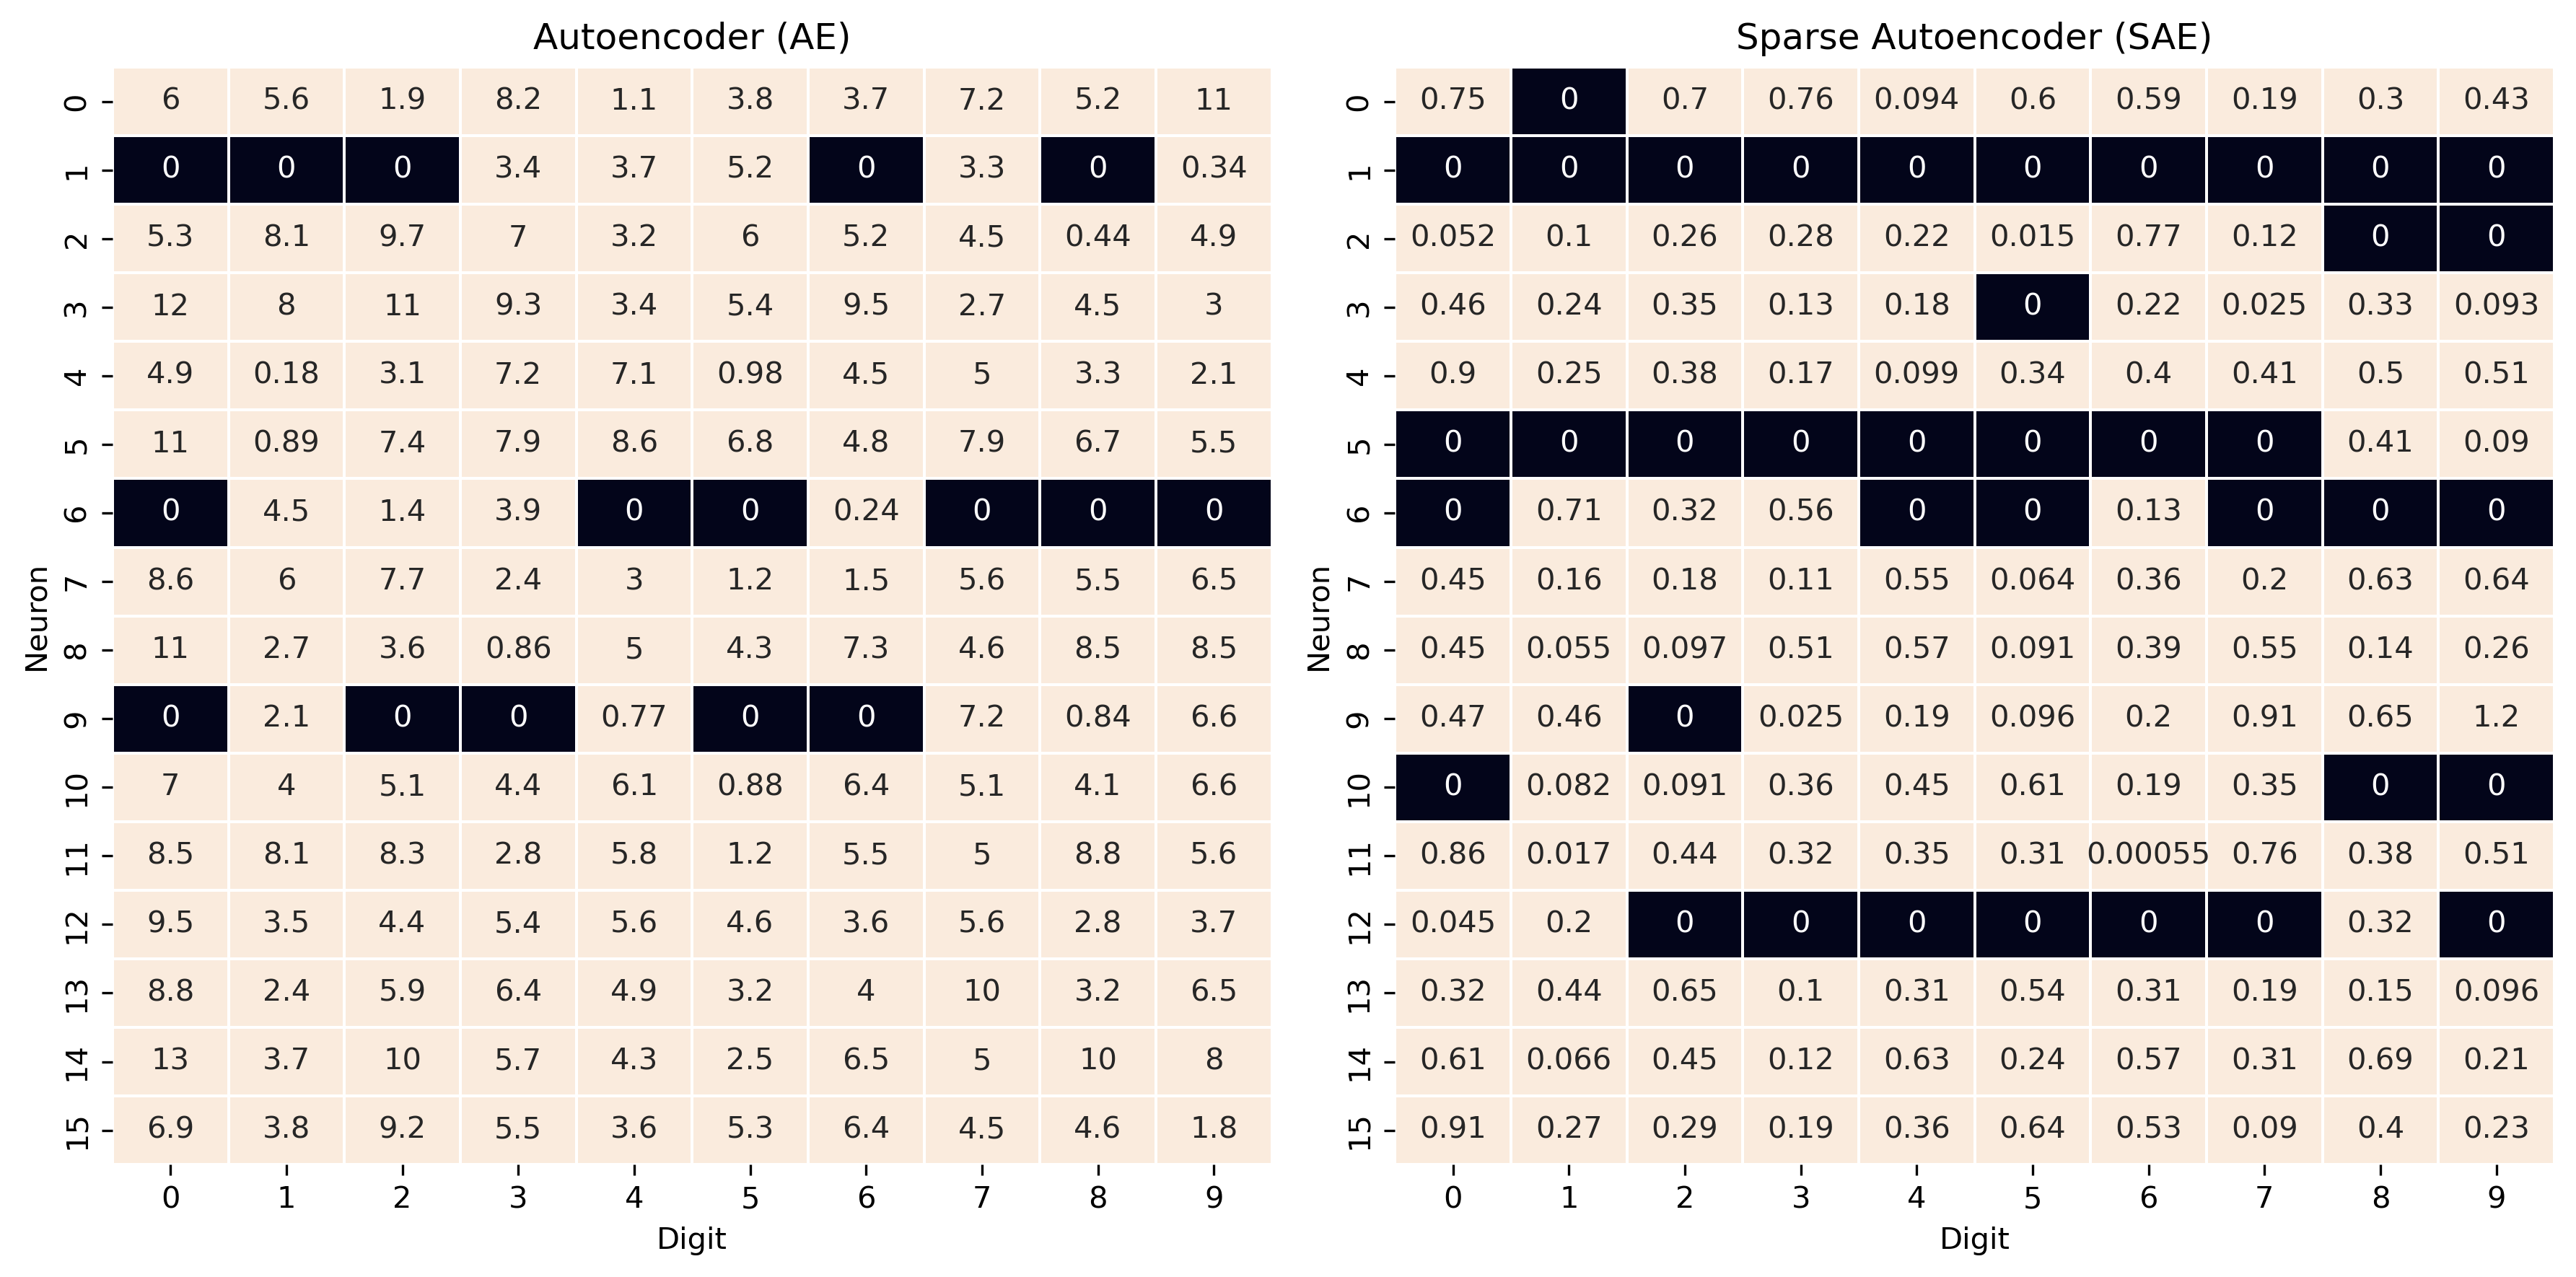

In [120]:
# Plot SNS heatmap
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=False, tight_layout=True, figsize=(12,6), dpi=300)
sns.heatmap(AE_encoded_imgs.transpose(), linewidth=0.5, annot=True, vmin=0, vmax=0.01, cbar=False, ax=ax1)
sns.heatmap(SAE_encoded_imgs.transpose(), linewidth=0.5, annot=True, vmin=0, vmax=0.00001, cbar=False, ax=ax2)
ax1.set(title='Autoencoder (AE)', xlabel='Digit', ylabel='Neuron')
ax2.set(title='Sparse Autoencoder (SAE)', xlabel='Digit', ylabel='Neuron')
plt.show()

# We can see from the above chart that our SAE model is much more sparse, with a three times higher number of inactive neurons than Undercomplete AE.

# ---------------------------------------------------------------------------------------------------------------

# SAE Model in Australian Weather Dataset. 

In [121]:
# Set Pandas options to display more columns
pd.options.display.max_columns=50

# Read in the weather data csv
df=pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/weatherAUS.csv', encoding='utf-8')

In [122]:
# Drop rows where any of the values are missing. 
# Note, in this case it drops ~60% of the rows. Since we are using this data just as an example, it's ok.
# However, when you work with your own data, you may want to explore other options to fill in NA's with, say, mean values
df=df.dropna(axis=0)

# Create a flag for RainToday
df['RainTodayFlag']=df['RainToday'].apply(lambda x: 1 if x=='Yes' else 0)

In [123]:
# Select data for modeling
X=df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 
      'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',  
      'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTodayFlag']]

# Scale training data so it is between 0 and 1
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(X)
#you dont have y because it is unsupervosed not label data. 
# Create training and testing samples
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=0)

In [124]:
X_train.shape

(45136, 17)

# Build SAE Model

In [125]:
#--- Define Shapes
n_inputs=X_train.shape[1] # number of input neurons = the number of features in X_train
n_bottleneck=(round(float(n_inputs) / 2.0)) # bottleneck to have half the number of neurons

In [126]:
#--- Input Layer 
visible = Input(shape=(n_inputs), name='Input-Layer') # Specify input shape

In [127]:
#--- Encoder Layer
s = Dense(units=n_inputs, name='Encoder-Layer')(visible)
s = BatchNormalization(name='Encoder-Layer-Normalization')(s)
s = LeakyReLU(name='Encoder-Layer-Activation')(s)

In [128]:
#--- Bottleneck
SAE_bottleneck = Dense(units=n_bottleneck,activity_regularizer=keras.regularizers.L1(0.0001), name='SAE-Bottleneck-Layer')(s)

In [129]:
#--- Decoder Layer
d = Dense(units=n_inputs, name='Decoder-Layer')(SAE_bottleneck)
d = BatchNormalization(name='Decoder-Layer-Normalization')(d)
d = LeakyReLU(name='Decoder-Layer-Activation')(d)

In [ ]:
#----------- Build SAE Model ----------#

# Shapes
SAE_n_inputs=X_train.shape[1] #--- No. of neurons for the input and output layers
SAE_n_hidden=16 #--- No. of neurons for the hidden layers (including bottleneck)

# Layers
SAE_visible = Input(shape=(SAE_n_inputs,), name='SAE-Input-Layer') #--- Input-Layer 
SAE_enc_hidden = Dense(units=SAE_n_hidden, activation='relu', name='SAE-Encoder-Hidden-Layer')(SAE_visible) #--- Encoder-Hidden-Layer
# Instead of (or in addition to) relying on fewer neurons, SAE uses regularisation to enforce sparsity.
#By sparsity, we mean that fewer neurons can be activated at the same time, creating an information bottleneck similar to that of Unercomplete AE. 
SAE_bottleneck = Dense(units=SAE_n_hidden, activation='relu', activity_regularizer=keras.regularizers.L1(0.0001), name='SAE-Bottleneck-Layer')(SAE_enc_hidden) #--- Bottleneck-Layer
SAE_dec_hidden = Dense(units=SAE_n_hidden, activation='relu', name='SAE-Decoder-Hidden-Layer')(SAE_bottleneck) #--- Decoder-Hidden-Layer 
SAE_output = Dense(units=SAE_n_inputs, activation='sigmoid', name='SAE-Output-Layer')(SAE_dec_hidden) #--- Output-Layer

In [130]:
#--- Output layer
output = Dense(units=n_inputs, activation='linear', name='Output-Layer')(d)

In [131]:
# Define autoencoder model
model = Model(inputs=visible, outputs=output, name='SAE-Model')

# Compile autoencoder model
#In deep learning, compilation is a step that transforms the simple sequence of layers that we previously defined into a highly efficient series of matrix transformations.
#You can interpret compilation as a precompute step that makes it possible for the computer to train the model.
#It checks for format errors, and defines the loss function, the optimizer or learning rate, and the metrics.
model.compile(optimizer='adam', loss='mse')

In [132]:
# Print model summary
print(model.summary())

Model: "SAE-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input-Layer (InputLayer)    [(None, 17)]              0         
                                                                 
 Encoder-Layer (Dense)       (None, 17)                306       
                                                                 
 Encoder-Layer-Normalization  (None, 17)               68        
  (BatchNormalization)                                           
                                                                 
 Encoder-Layer-Activation (L  (None, 17)               0         
 eakyReLU)                                                       
                                                                 
 SAE-Bottleneck-Layer (Dense  (None, 8)                144       
 )                                                               
                                                         

In [133]:
# Fit the autoencoder model to reconstruct input
#we batch the data in order to not fit all the training data at the same time. 
#In every epoch the model learns and the weights and biases are adjusted to minimze the loss. 
history = model.fit(X_train, X_train, epochs=10, batch_size=16, verbose=1, validation_data=(X_test, X_test))

Epoch 1/10
2821/2821 [==============================] - 5s 2ms/step - loss: 0.0306 - val_loss: 0.0052
Epoch 2/10
2821/2821 [==============================] - 4s 1ms/step - loss: 0.0076 - val_loss: 0.0032
Epoch 3/10
2821/2821 [==============================] - 5s 2ms/step - loss: 0.0061 - val_loss: 0.0023
Epoch 4/10
2821/2821 [==============================] - 5s 2ms/step - loss: 0.0055 - val_loss: 0.0023
Epoch 5/10
2821/2821 [==============================] - 6s 2ms/step - loss: 0.0052 - val_loss: 0.0021
Epoch 6/10
2821/2821 [==============================] - 5s 2ms/step - loss: 0.0049 - val_loss: 0.0021
Epoch 7/10
2821/2821 [==============================] - 5s 2ms/step - loss: 0.0047 - val_loss: 0.0019
Epoch 8/10
2821/2821 [==============================] - 5s 2ms/step - loss: 0.0044 - val_loss: 0.0020
Epoch 9/10
2821/2821 [==============================] - 5s 2ms/step - loss: 0.0042 - val_loss: 0.0019
Epoch 10/10
2821/2821 [==============================] - 5s 2ms/step - loss: 0.004

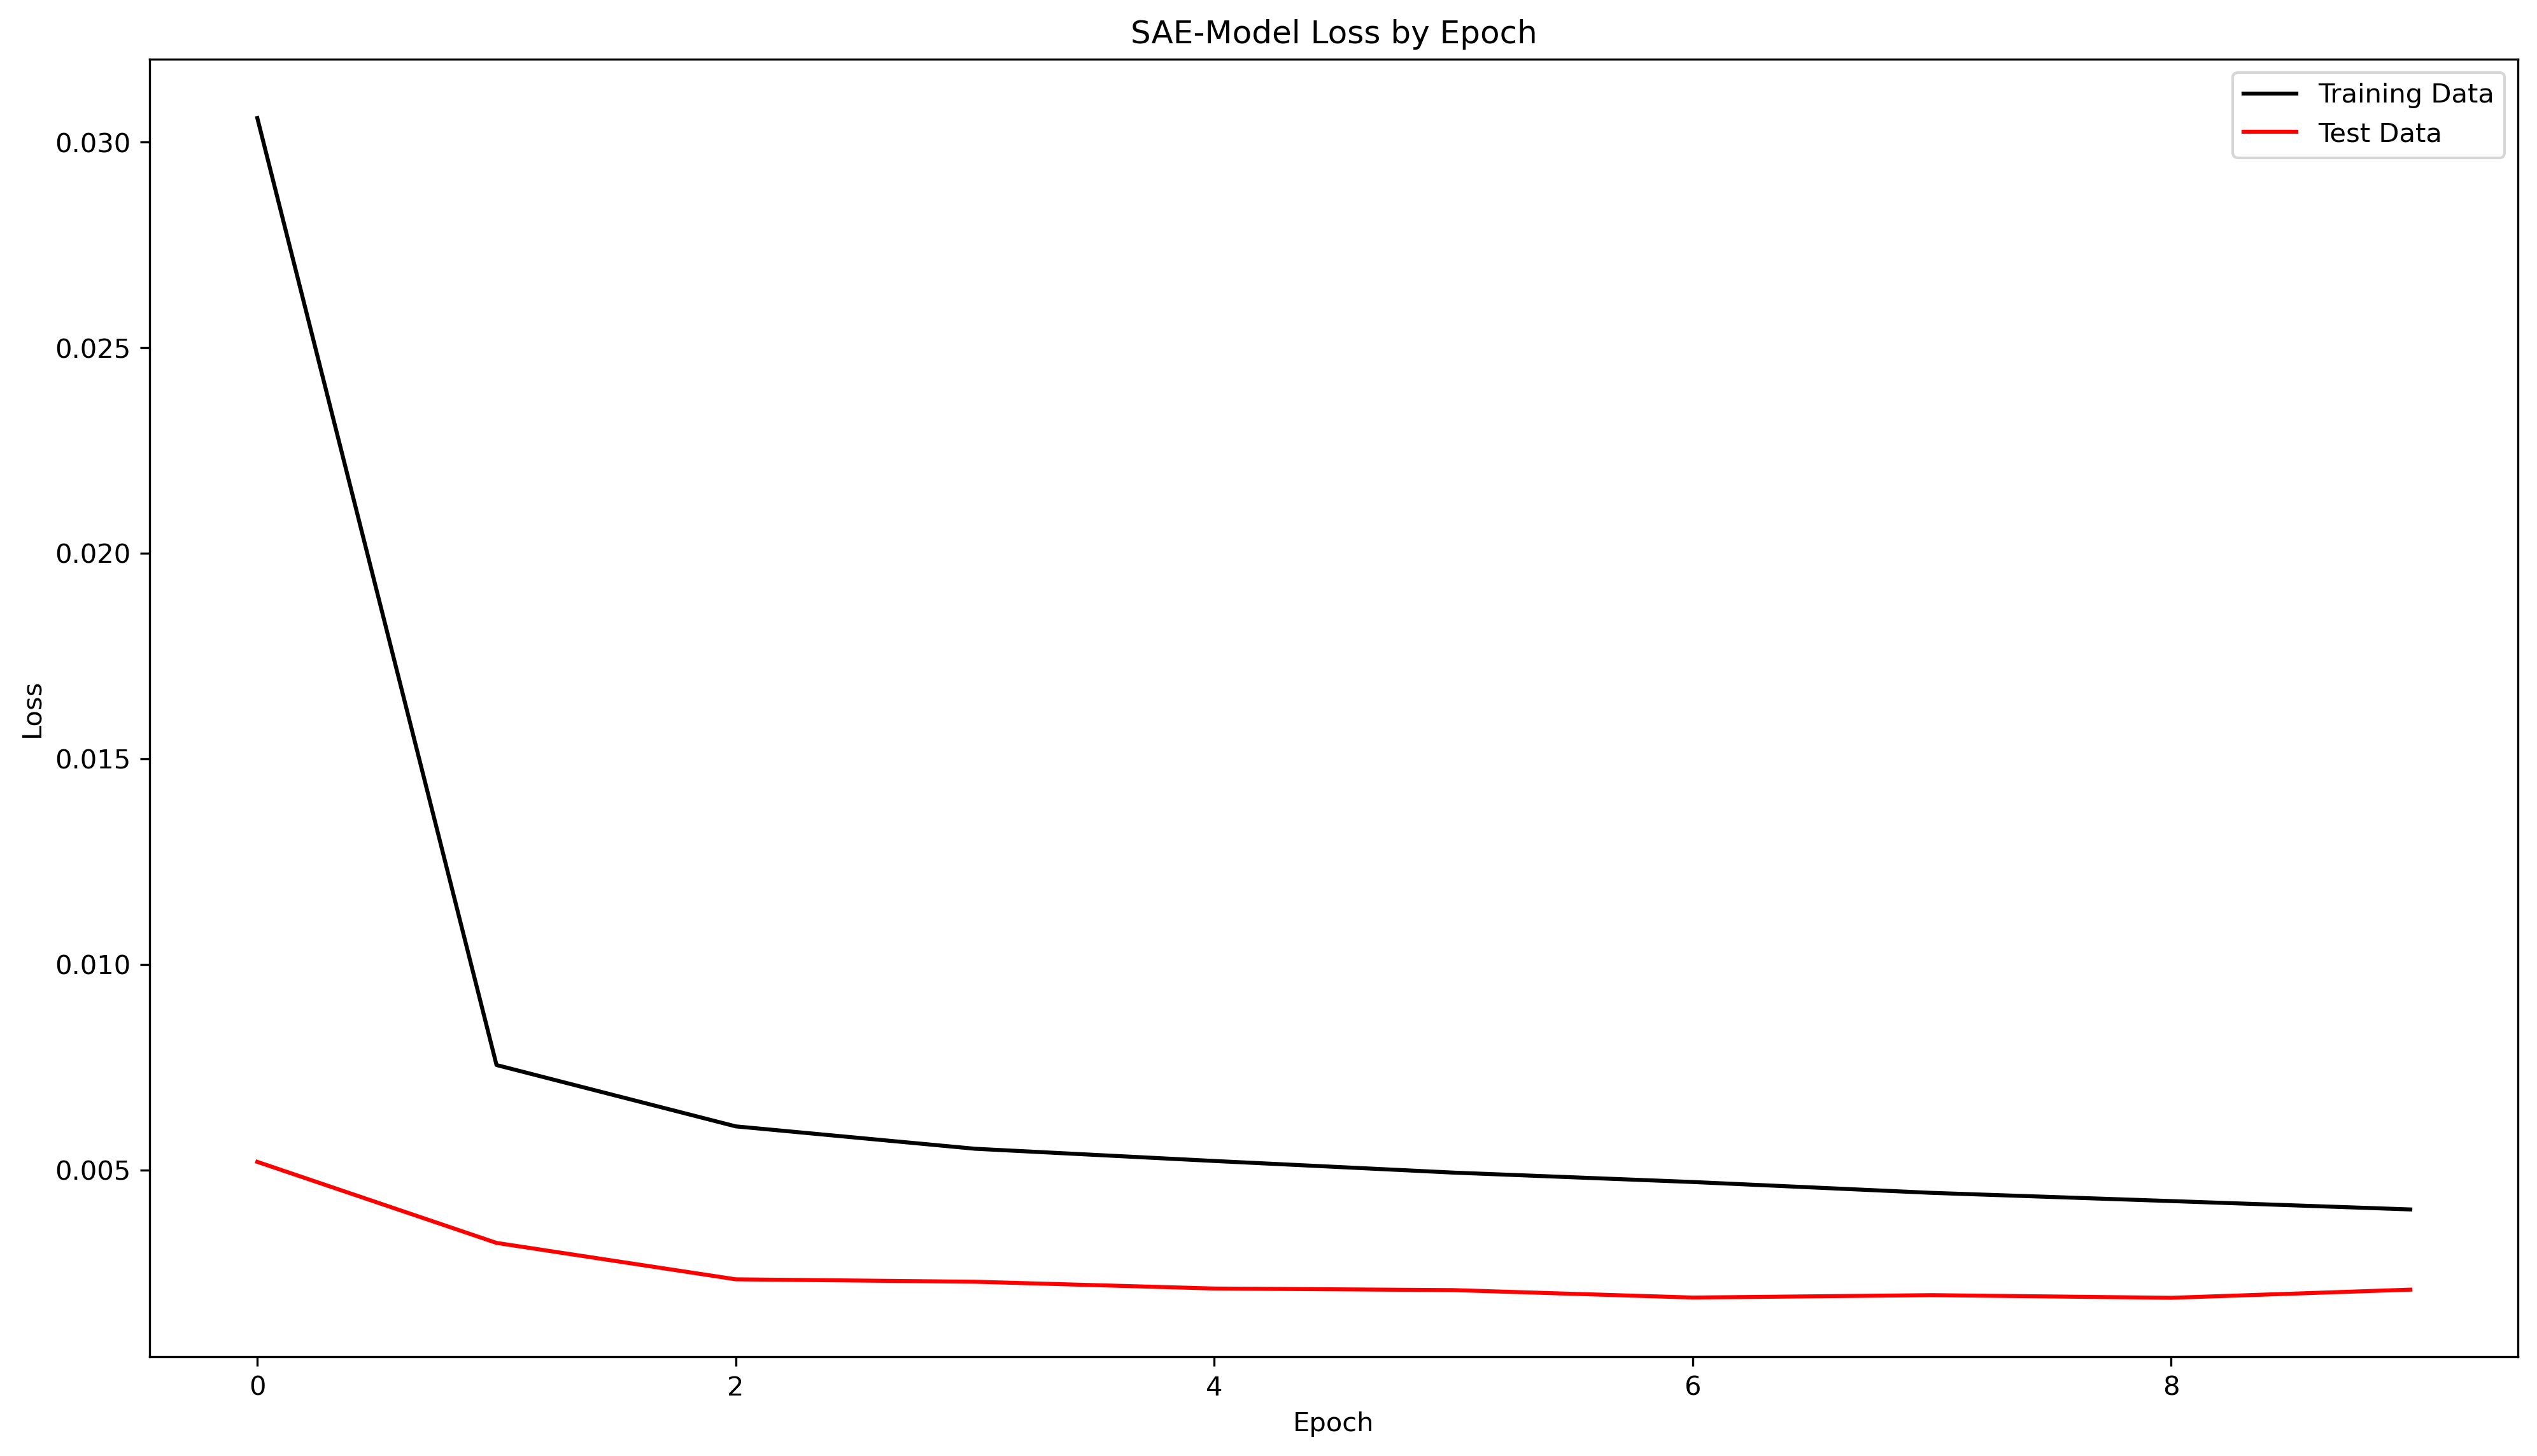

In [135]:
# Plot a loss chart
fig, ax = plt.subplots(figsize=(16,9), dpi=300)
plt.title(label='SAE-Model Loss by Epoch', loc='center')

ax.plot(history.history['loss'], label='Training Data', color='black')
ax.plot(history.history['val_loss'], label='Test Data', color='red')
ax.set(xlabel='Epoch', ylabel='Loss')
plt.legend()

plt.show()

# We can see that our SAE model was able to reconstruct the data with only a minimal loss.

In [136]:
# Define an encoder model without the decoder
SAE_encoder = Model(inputs=visible, outputs=SAE_bottleneck)

# Compile encoder model
SAE_encoder.compile(optimizer='adam', loss='mse')

# Save the encoder model to file
SAE_encoder.save('C:/Users/Admin/Machine Learning chapter 5/Deep Learning basics with Python/SAE_encoder.h5')

In [140]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
6049  2009-01-01    Cobar     17.9     35.2       0.0         12.0      12.3   
6050  2009-01-02    Cobar     18.4     28.9       0.0         14.8      13.0   
6052  2009-01-04    Cobar     19.4     37.6       0.0         10.8      10.6   
6053  2009-01-05    Cobar     21.9     38.4       0.0         11.4      12.2   
6054  2009-01-06    Cobar     24.2     41.0       0.0         11.2       8.4   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
6049         SSW           48.0        ENE         SW           6.0   
6050           S           37.0        SSE        SSE          19.0   
6052         NNE           46.0        NNE        NNW          30.0   
6053         WNW           31.0        WNW        WSW           6.0   
6054         WNW           35.0         NW        WNW          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
6049          20.0         20.0         13.0       1006.3       1004.4   
6050          19.0         30.0          8.0       1012.9       1012.1   
6052          15.0         42.0         22.0       1012.3       1009.2   
6053           6.0         37.0         22.0       1012.7       1009.1   
6054          13.0         19.0         15.0       1010.7       1007.4   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  \
6049       2.0       5.0     26.6     33.4        No           No   
6050       1.0       1.0     20.3     27.0        No           No   
6052       1.0       6.0     28.7     34.9        No           No   
6053       1.0       5.0     29.1     35.6        No           No   
6054       1.0       6.0     33.6     37.6        No           No   

      RainTodayFlag  
6049              0  
6050              0  
6052              0  
6053              0  
6054              0

In [141]:
# Create a flag for RainToday
df['RainTomorrowFlag']=df['RainTomorrow'].apply(lambda x: 1 if x=='Yes' else 0)

In [142]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
6049  2009-01-01    Cobar     17.9     35.2       0.0         12.0      12.3   
6050  2009-01-02    Cobar     18.4     28.9       0.0         14.8      13.0   
6052  2009-01-04    Cobar     19.4     37.6       0.0         10.8      10.6   
6053  2009-01-05    Cobar     21.9     38.4       0.0         11.4      12.2   
6054  2009-01-06    Cobar     24.2     41.0       0.0         11.2       8.4   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
6049         SSW           48.0        ENE         SW           6.0   
6050           S           37.0        SSE        SSE          19.0   
6052         NNE           46.0        NNE        NNW          30.0   
6053         WNW           31.0        WNW        WSW           6.0   
6054         WNW           35.0         NW        WNW          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
6049          20.0         20.0         13.0       1006.3       1004.4   
6050          19.0         30.0          8.0       1012.9       1012.1   
6052          15.0         42.0         22.0       1012.3       1009.2   
6053           6.0         37.0         22.0       1012.7       1009.1   
6054          13.0         19.0         15.0       1010.7       1007.4   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  \
6049       2.0       5.0     26.6     33.4        No           No   
6050       1.0       1.0     20.3     27.0        No           No   
6052       1.0       6.0     28.7     34.9        No           No   
6053       1.0       5.0     29.1     35.6        No           No   
6054       1.0       6.0     33.6     37.6        No           No   

      RainTodayFlag  RainTomorrowFlag  
6049              0                 0  
6050              0                 0  
6052              0                 0  
6053              0                 0  
6054              0                 0

In [143]:
# Select data for modeling
X=df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 
      'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',  
      'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTodayFlag']]
y=df['RainTomorrowFlag'].values

# Scale training data so it is between 0 and 1
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(X)

# Create training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
#X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=0)

In [147]:
X.shape

(56420, 17)

In [144]:
# Encode train and test data
X_train_encoded = SAE_encoder.predict(X_train)
X_test_encoded = SAE_encoder.predict(X_test)

In [145]:
X_train_encoded.shape, y_train.shape

((45136, 8), (45136,))

In [146]:
# Fit the model
model3 = LogisticRegression(solver='sag')
clf3 = model3.fit(X_train_encoded, y_train)

# Predict class labels on train and test data
pred_labels_tr3 = model3.predict(X_train_encoded)
pred_labels_te3 = model3.predict(X_test_encoded)


print('****************** Summary ******************')
# Print slope and intercept
print('Intercept (Beta 0): ', clf3.intercept_)
print('Slope (Beta 1): ', clf3.coef_)
print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Test Data ***************')
score_te3 = model3.score(X_test_encoded, y_test)
print('Accuracy Score: ', score_te3)
# Look at classification report to evaluate the model
print(classification_report(y_test, pred_labels_te3))
print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Training Data ***************')
score_tr3 = model3.score(X_train_encoded, y_train)
print('Accuracy Score: ', score_tr3)
# Look at classification report to evaluate the model
print(classification_report(y_train, pred_labels_tr3))
print('--------------------------------------------------------')

****************** Summary ******************
Intercept (Beta 0):  [-1.9379417]
Slope (Beta 1):  [[  6.009492   20.105143  -11.610792   -3.0951397  14.526344   -7.441164
    8.965371   -3.3934526]]
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.8410138248847926
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      8854
           1       0.71      0.45      0.55      2430

    accuracy                           0.84     11284
   macro avg       0.78      0.70      0.73     11284
weighted avg       0.83      0.84      0.83     11284

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.8359624246721021
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     35139
           1       0.71      0.44      0.54      9997

    acc

# The SAE model like the undercomplete AE reduces the features from  17 to 8 according to the bottleneck hidden layer and adding the regularization parameter to inactive more neurons.  

# SAE model for dimensionality reduction use Sparsity and the accuracy scores are better than undercomplete AE. 

# However, the accuracy scores WITHOUT the dimensionality reduction of either method is giving better results: 85% on testing data. 

# ---------------------------------------------------------------------------------------------------------------

# Denoising Autoencoders (DAE) — How To Use Neural Networks to Clean Up Your Data

In [162]:
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Model # for creating a Neural Network Autoencoder model
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense, LeakyReLU, BatchNormalization # for adding layers to DAE model
from tensorflow.keras.utils import plot_model # for plotting model diagram

# Data manipulation
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

# Visualization
import matplotlib 
import matplotlib.pyplot as plt # for plotting model loss
print('matplotlib: %s' % matplotlib.__version__) # print version
import graphviz # for showing model diagram
print('graphviz: %s' % graphviz.__version__) # print version

# Other utilities
import sys
import os

# Assign main directory to a variable
main_dir=os.path.dirname(sys.path[0])
#print(main_dir)

Tensorflow/Keras: 2.7.0
numpy: 1.20.3
matplotlib: 3.4.3
graphviz: 0.20.1


Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


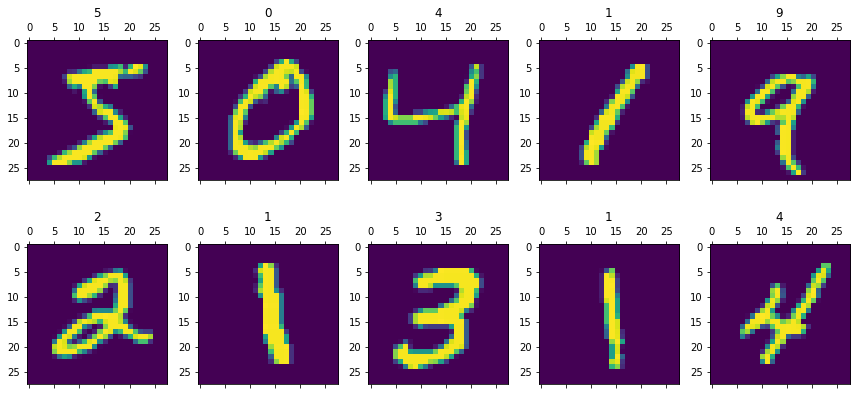

In [163]:

# Load digits data 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

# Normalize (divide by 255) input data
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Display images of the first 10 digits in the training set and their true lables
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_train[n])
        axs[i,j].set(title=y_train[n])
        n=n+1
plt.show() 

Now is the time to add some noise to our images. Using the below code, you can specify the level of noise, which of course, impacts the final model. The more noise we add, the harder it will be for the model to clean it up.

In [164]:
#random. normal, the Numpy random normal function allows us to create normally distributed data, 
#while specifying important parameters like the mean and standard deviation.
np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)

array([[[ 1.64819137,  0.41247383,  0.38788122, ..., -0.07891764,
         -0.20246378, -0.60188207],
        [ 0.72920166, -0.48547597,  0.3404482 , ..., -0.39213857,
         -0.60457209,  0.95950423],
        [-0.1503122 , -0.59479253,  1.10951296, ..., -0.33560549,
          0.73572543, -0.27109756],
        ...,
        [ 1.43938752,  1.82364682,  0.71753681, ...,  1.14217956,
          0.78585217, -0.36260232],
        [ 1.65856394,  0.78790248, -0.63088443, ...,  0.60004413,
         -1.0921307 ,  0.1232799 ],
        [-0.90443546,  1.90862442,  0.72755305, ..., -1.42400511,
          0.85462349, -2.94462287]],

       [[-1.34306144, -0.11339423,  1.18482729, ...,  0.51435789,
         -0.90386093,  1.35417514],
        [ 2.00306459,  0.99572877, -0.67495246, ..., -0.25511108,
         -0.46247438, -0.36223765],
        [-0.77543759,  1.14633059,  1.39111657, ...,  1.31321333,
          0.76969166, -0.47880883],
        ...,
        [ 0.17308943, -0.13511939, -3.17980582, ...,  

In [165]:
# Specify how much noise to add
level_of_noise=0.5

# Add random noise based on sampling from Gaussian distribution
X_train_noisy = X_train + level_of_noise * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + level_of_noise * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

In [166]:
X_train_noisy.max()

3.529349996543925

In [167]:
X_test_noisy.max()

3.2777811547240026

In [168]:
# Enforce min-max boundaries so it does not go beyond [0,1] range
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

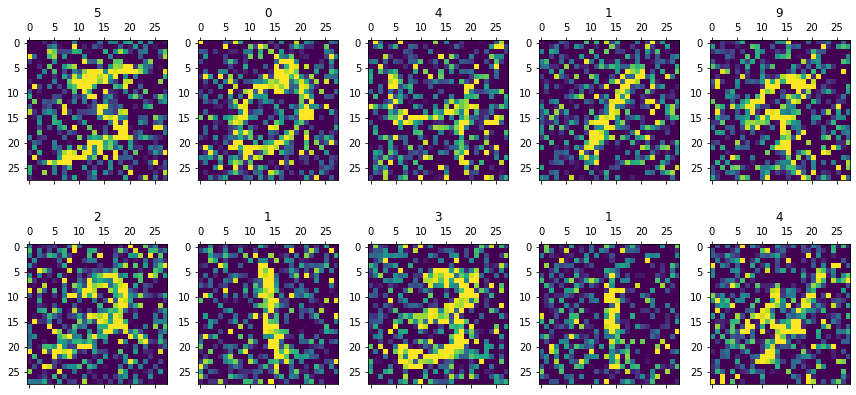

In [169]:
# Display images of the first 10 digits in the noisy training data
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_train_noisy[n])
        axs[i,j].set(title=y_train[n])
        n=n+1
plt.show() 

The final step before building a DAE is to reshape our inputs. The reason for flattening our images is because, in this example, we will make a standard DAE, not a Convolutional DAE.

In [170]:

# Reshape input data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train_noisy = X_train_noisy.reshape(60000, 784)
X_test_noisy = X_test_noisy.reshape(10000, 784)

# Print shapes
print("New shape of X_train: ", X_train.shape)
print("New shape of X_test: ", X_test.shape)

print("New shape of X_train_noisy: ", X_train_noisy.shape)
print("New shape of X_test_noisy: ", X_test_noisy.shape)

New shape of X_train:  (60000, 784)
New shape of X_test:  (10000, 784)
New shape of X_train_noisy:  (60000, 784)
New shape of X_test_noisy:  (10000, 784)


In [171]:
#--- Define Shapes
n_inputs=X_train.shape[1] # number of input neurons = the number of features X_train

#--- Input Layer 
visible = Input(shape=(n_inputs,), name='Input-Layer') # Specify input shape

#--- Encoder Layer
e = Dense(units=n_inputs, name='Encoder-Layer')(visible)
e = BatchNormalization(name='Encoder-Layer-Normalization')(e)
e = LeakyReLU(name='Encoder-Layer-Activation')(e)

#--- Middle Layer
middle = Dense(units=n_inputs, activation='linear', activity_regularizer=keras.regularizers.L1(0.0001), name='Middle-Hidden-Layer')(e)

#--- Decoder Layer
d = Dense(units=n_inputs, name='Decoder-Layer')(middle)
d = BatchNormalization(name='Decoder-Layer-Normalization')(d)
d = LeakyReLU(name='Decoder-Layer-Activation')(d)

#--- Output layer
output = Dense(units=n_inputs, activation='sigmoid', name='Output-Layer')(d)

# Define denoising autoencoder model
model = Model(inputs=visible, outputs=output, name='Denoising-Autoencoder-Model')

# Compile denoising autoencoder model
model.compile(optimizer='adam', loss='mse')

# Print model summary
print(model.summary())

Model: "Denoising-Autoencoder-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input-Layer (InputLayer)    [(None, 784)]             0         
                                                                 
 Encoder-Layer (Dense)       (None, 784)               615440    
                                                                 
 Encoder-Layer-Normalization  (None, 784)              3136      
  (BatchNormalization)                                           
                                                                 
 Encoder-Layer-Activation (L  (None, 784)              0         
 eakyReLU)                                                       
                                                                 
 Middle-Hidden-Layer (Dense)  (None, 784)              615440    
                                                                 
 Decoder-Layer (Dense)       (None, 784

first hidden layer params: 784*784 = 614.656 (all weights) + biases(784) pf the hidden layer = 615.440

In [172]:
#In keras, non-trainable parameters (as shown in model.summary()) means the number of weights that are not updated during training with backpropagation
#due to the Relu activation that does not fire all neurons. 

In [173]:
# Fit the Denoising autoencoder model to reconstruct original images
history = model.fit(X_train_noisy, X_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test_noisy, X_test))

Epoch 1/20
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0319 - val_loss: 0.0195
Epoch 2/20
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0189 - val_loss: 0.0179
Epoch 3/20
1875/1875 [==============================] - 38s 21ms/step - loss: 0.0162 - val_loss: 0.0193
Epoch 4/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0153 - val_loss: 0.0185
Epoch 5/20
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0147 - val_loss: 0.0162
Epoch 6/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0144 - val_loss: 0.0157
Epoch 7/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0141 - val_loss: 0.0152
Epoch 8/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0139 - val_loss: 0.0140
Epoch 9/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0137 - val_loss: 0.0135
Epoch 10/20
1875/1875 [==============================] - 38s 20m

In [177]:
print(history.history['loss'])
print(history.history['val_loss'])

[0.03191419690847397, 0.01891070418059826, 0.0162166990339756, 0.015251451171934605, 0.014745566062629223, 0.014352037571370602, 0.014117244631052017, 0.01392471045255661, 0.01372566819190979, 0.013579647988080978, 0.01342716347426176, 0.013295202516019344, 0.013197521679103374, 0.013111279346048832, 0.013025441206991673, 0.012956541031599045, 0.012857429683208466, 0.012797183357179165, 0.012749659828841686, 0.012676730751991272]
[0.019497167319059372, 0.017893536016345024, 0.019259247928857803, 0.018475711345672607, 0.01616569608449936, 0.015721358358860016, 0.015237629413604736, 0.013952932320535183, 0.013481544330716133, 0.013355780392885208, 0.013205116614699364, 0.013239892199635506, 0.013055937364697456, 0.012848951853811741, 0.012878322042524815, 0.012866077944636345, 0.012801780365407467, 0.012690773233771324, 0.012648213654756546, 0.012593626044690609]


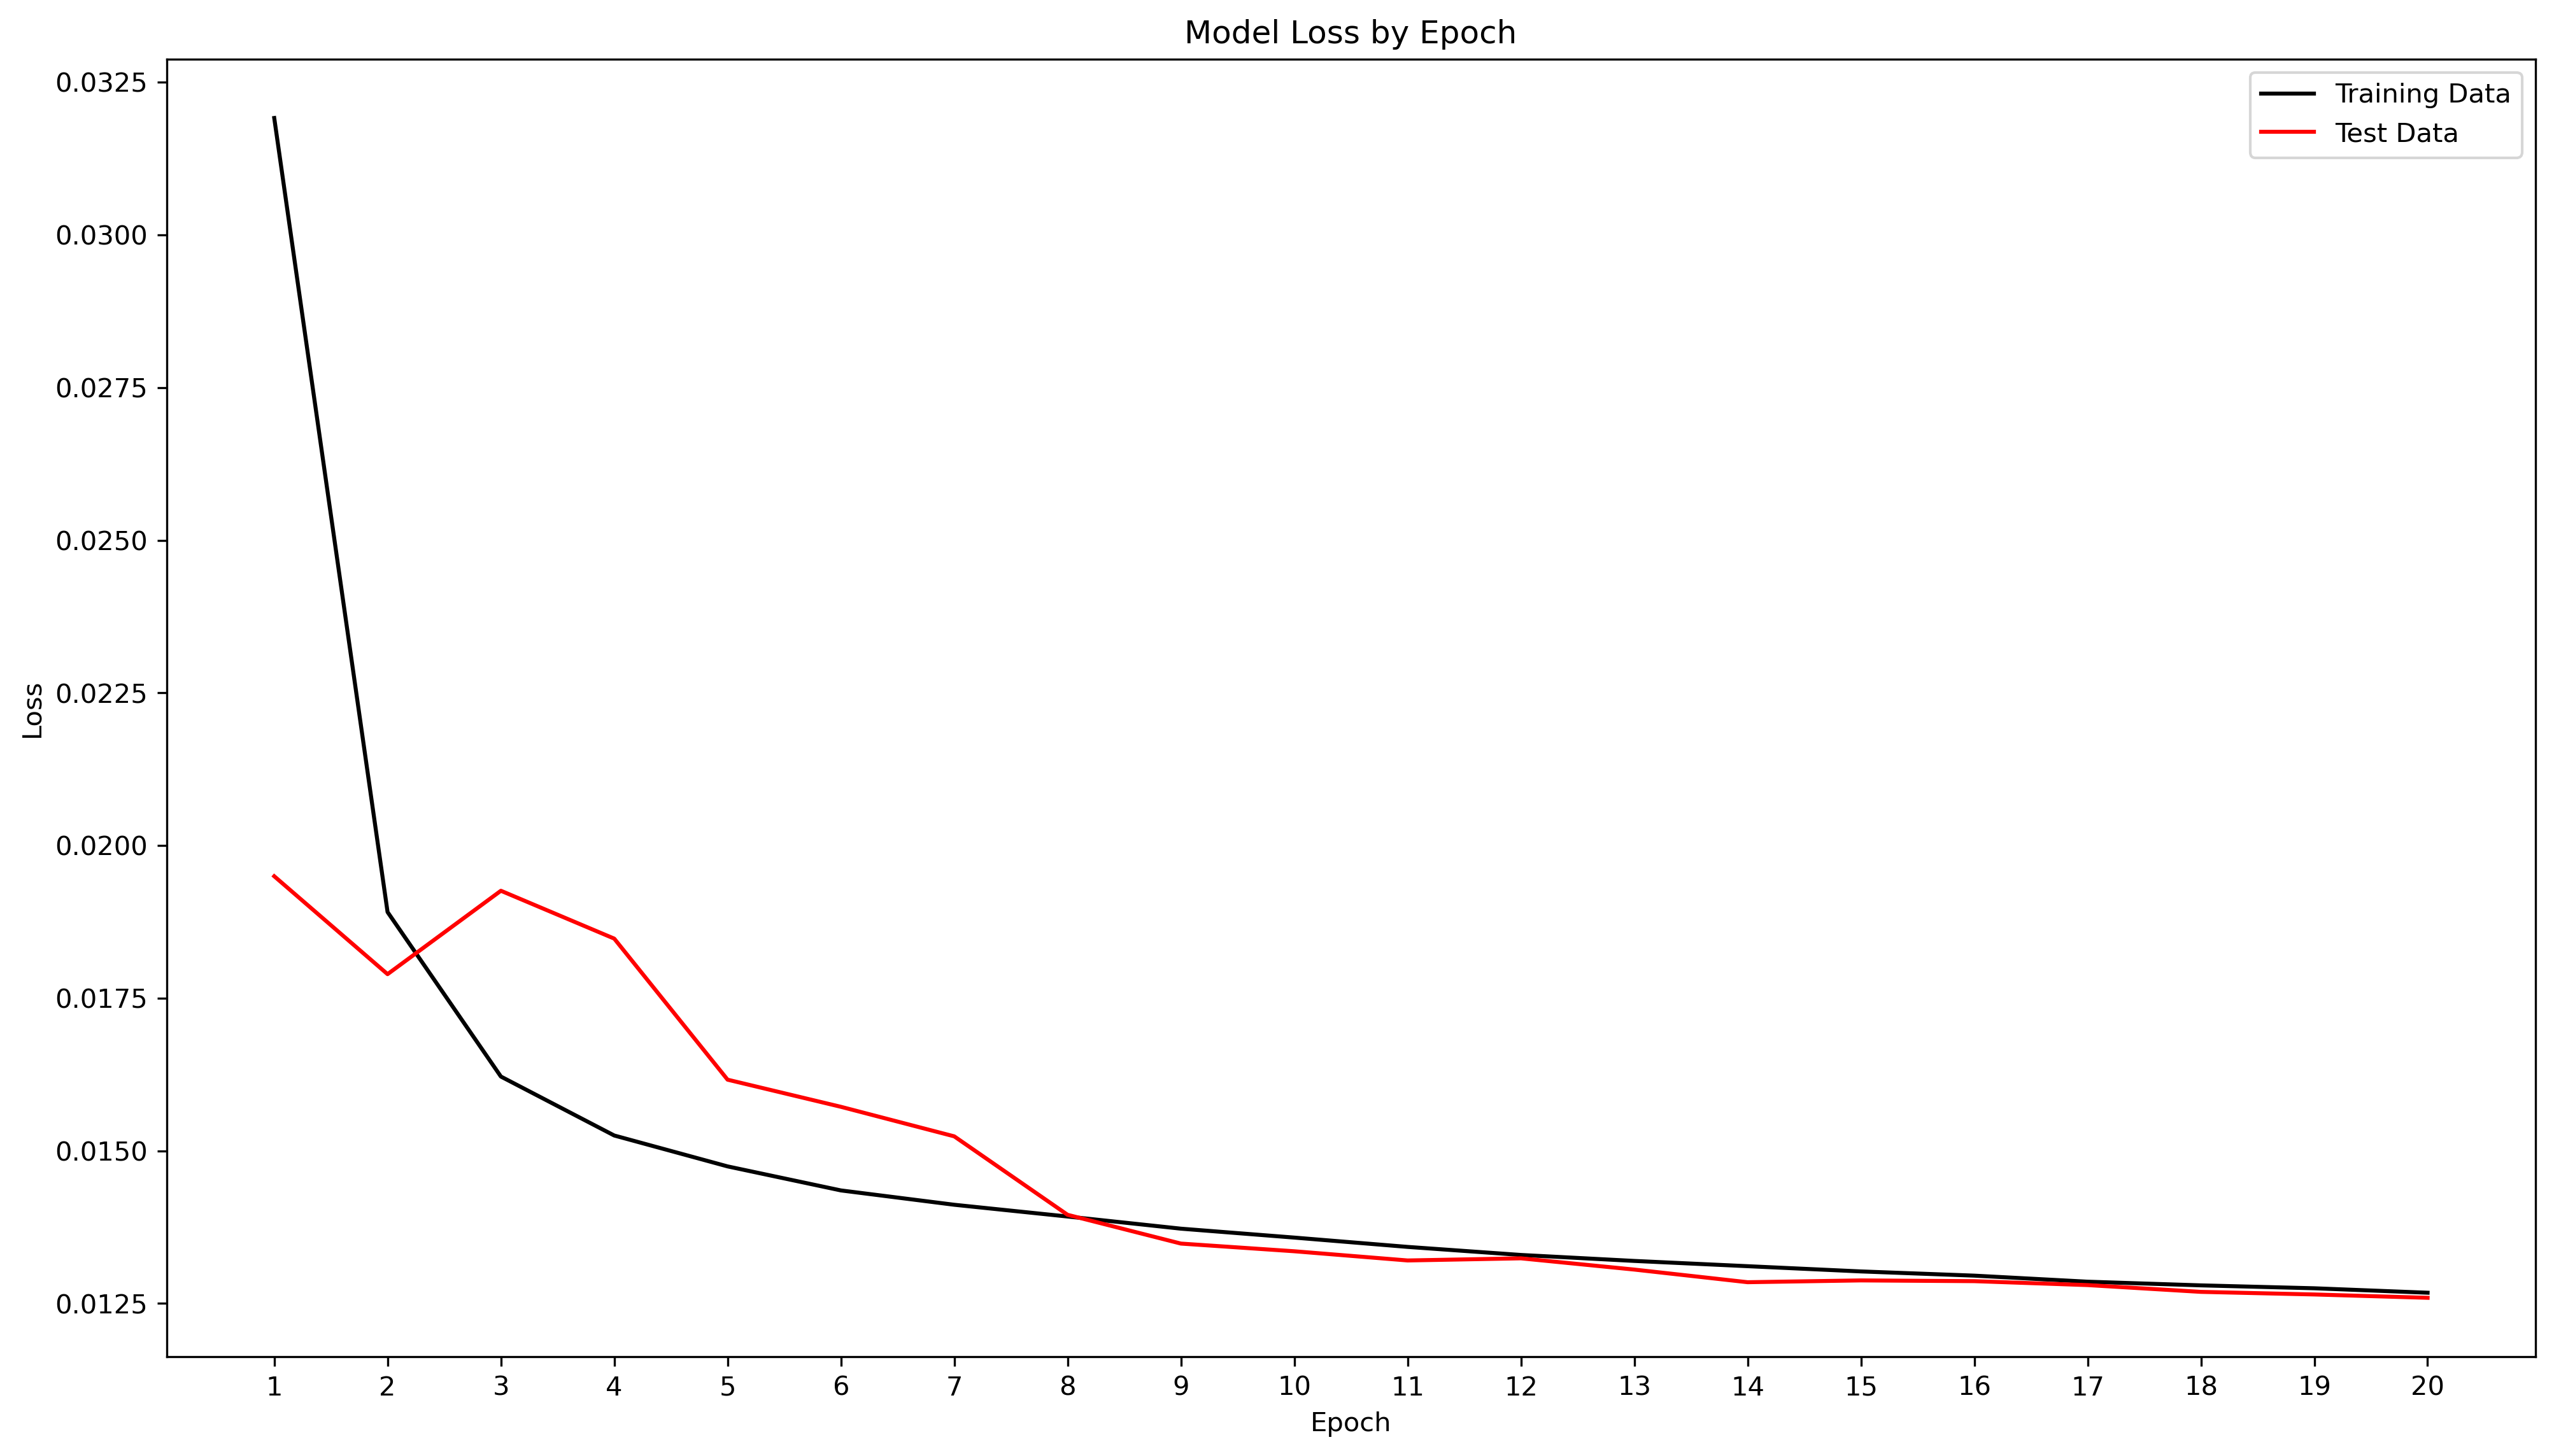

In [183]:
# Plot a loss chart
fig, ax = plt.subplots(figsize=(16,9), dpi=300)
plt.title(label='Model Loss by Epoch', loc='center')

ax.plot(history.history['loss'], label='Training Data', color='black')
ax.plot(history.history['val_loss'], label='Test Data', color='red')
ax.set(xlabel='Epoch', ylabel='Loss')
#epochs from 1 to 20. 
plt.xticks(ticks=np.arange(len(history.history['loss'])), labels=np.arange(1, len(history.history['loss'])+1))
plt.legend()

plt.show()

Finally, the time has come to evaluate our model visually. We will use the test dataset and display ten images from original, noisy, and denoised sets for comparison.

Original
Note that we have to reshape the dimension back to 28 x 28.

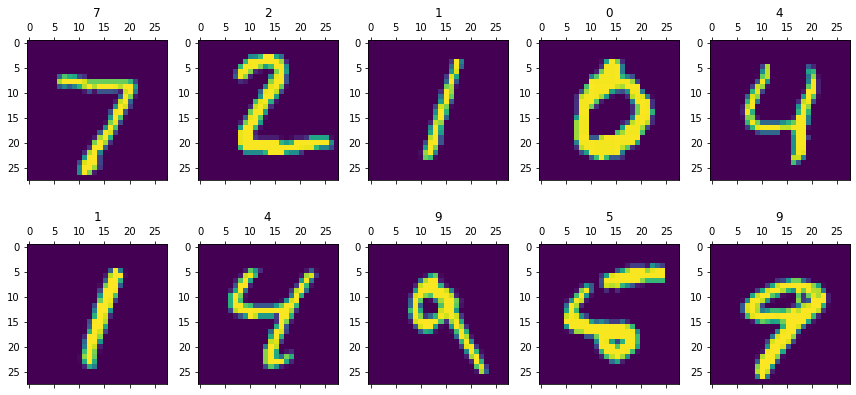

In [184]:
# Reshape back
X_test_back = X_test.reshape(10000, 28, 28)

# Display images of the first 10 digits
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_test_back[n])
        axs[i,j].set(title=y_test[n])
        n=n+1
plt.show() 

Noisy
Now we look at the images with noise added.

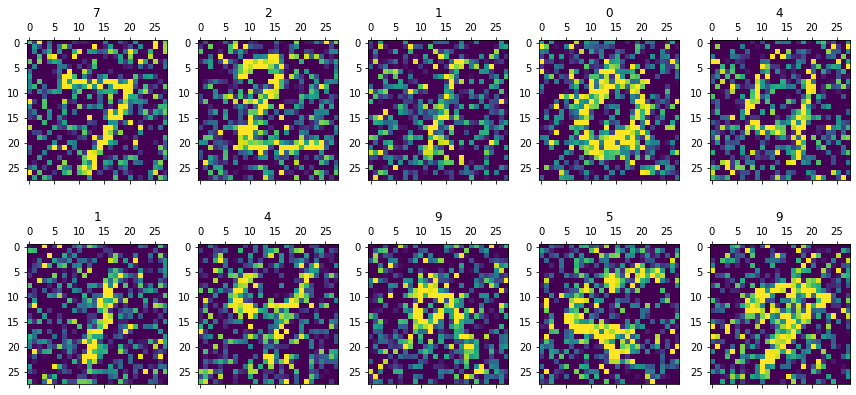

In [185]:
# Reshape back
X_test_noisy_reshaped = X_test_noisy.reshape(10000, 28, 28)

# Display images of the first 10 digits
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_test_noisy_reshaped[n])
        axs[i,j].set(title=y_test[n])
        n=n+1
plt.show() 

# Denoised
Finally, let’s use our DAE to process noisy images and display the output.

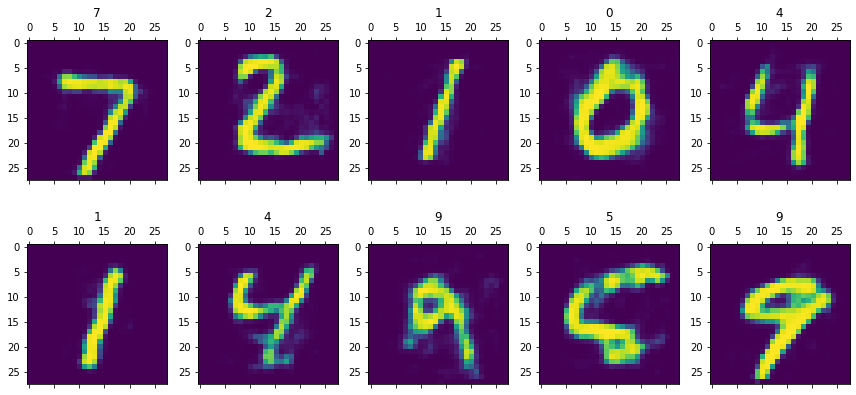

In [186]:

# Apply denoising model 
#X_train_denoised = model.predict(X_train_noisy).reshape(60000, 28, 28)
X_test_denoised = model.predict(X_test_noisy).reshape(10000, 28, 28)

# Display images of the first 10 digits
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_test_denoised[n])
        axs[i,j].set(title=y_test[n])
        n=n+1
plt.show() 

# Even though we did not experiment with different network setups and hyperparameter tuning, the results are impressive. 